In [1]:
# ===================================================
# Import necessary libraries / Импорт необходимых библиотек
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import os
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, classification_report
import time
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import clone
import joblib 
import sys
from scipy import stats

# Define timestamp for file naming
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Import machine learning methods / Импорт методов машинного обучения
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

# Import balancing methods / Импорт методов балансировки
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Ignore warnings / Игнорирование предупреждений
warnings.filterwarnings('ignore')

In [2]:
# Игнорирование предупреждений / Ignoring warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# ===================================================
# Data loading and preprocessing / Загрузка и предобработка данных
# ===================================================
print("\nLoading and preprocessing data... / Загрузка и предобработка данных...")

# Load data / Загрузка данных
df = pd.read_csv('Dataset.csv')
df.head(3)


Loading and preprocessing data... / Загрузка и предобработка данных...


,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.59,...,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Filter data / Фильтрация данных
target_parts = ["RG3 MOLD'G W/SHLD, RH", "RG3 MOLD'G W/SHLD, LH", "CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH"]
df_filtered = df[df['PART_NAME'].isin(target_parts)].copy()

In [5]:
# One-hot encoding для PART_NAME
print("\nПрименение one-hot кодирования для PART_NAME...")
part_name_dummies = pd.get_dummies(df_filtered['PART_NAME'], prefix='Part')
print(f"Добавлено {len(part_name_dummies.columns)} новых признаков после one-hot кодирования")



Применение one-hot кодирования для PART_NAME...
Добавлено 4 новых признаков после one-hot кодирования


In [6]:
# Transform target variable / Преобразование целевой переменной
df_filtered['PassOrFail'] = df_filtered['PassOrFail'].map({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0, '1': 1, '0': 0})

In [7]:
# Remove non-numeric columns / Удаление нечисловых колонок
non_numeric_cols = df_filtered.select_dtypes(exclude=['int64', 'float64']).columns
non_numeric_cols = [col for col in non_numeric_cols if col != 'PassOrFail']
df_filtered = df_filtered.drop(columns=non_numeric_cols)

In [8]:
# Добавляем закодированные признаки PART_NAME
df_filtered = pd.concat([df_filtered, part_name_dummies], axis=1)
print("\nСтруктура данных после one-hot кодирования:")
print(f"Количество признаков: {df_filtered.shape[1]}")
print(f"Количество наблюдений: {df_filtered.shape[0]}")


Структура данных после one-hot кодирования:
Количество признаков: 42
Количество наблюдений: 7992


In [9]:
# Fill missing values / Заполнение пропущенных значений
df_filtered = df_filtered.fillna(df_filtered.median())


In [10]:
# Split data / Разделение данных
X = df_filtered.drop('PassOrFail', axis=1)
y = df_filtered['PassOrFail'].values

In [11]:
# Normalize data / Нормализация данных
scaler = StandardScaler()
# Не нормализуем one-hot признаки
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [12]:
# Save processed data / Сохранение обработанных данных
os.makedirs('results', exist_ok=True)
df_filtered.to_csv('results/processed_data.csv', index=False)
print(f"Processed data saved to results/processed_data.csv / Обработанные данные сохранены в results/processed_data.csv")

Processed data saved to results/processed_data.csv / Обработанные данные сохранены в results/processed_data.csv


In [13]:
# Split into train and test / Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [14]:
# Выводим информацию о распределении классов в наборах данных
print("\nРаспределение классов:")
print("Обучающая выборка:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nТестовая выборка:")
print(pd.Series(y_test).value_counts(normalize=True))


Распределение классов:
Обучающая выборка:
1    0.991062
0    0.008938
Name: proportion, dtype: float64

Тестовая выборка:
1    0.991243
0    0.008757
Name: proportion, dtype: float64


In [15]:
# ===================================================
# Data visualization / Визуализация данных
# ===================================================
print("\nCreating data analysis plots... / Создание графиков для анализа данных...")


Creating data analysis plots... / Создание графиков для анализа данных...


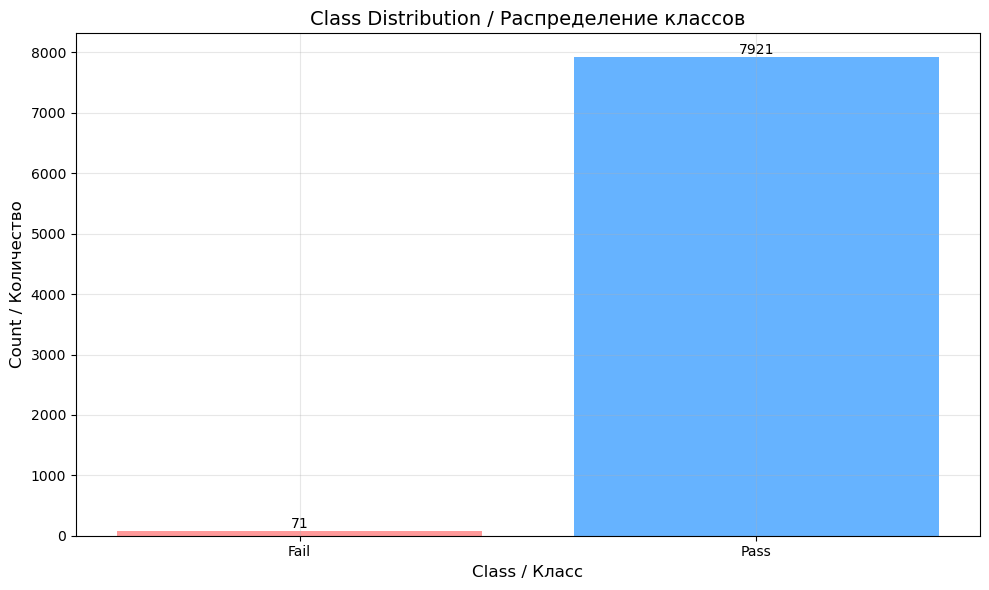

In [16]:
# 1. Class distribution / Распределение классов
plt.figure(figsize=(10, 6))
unique_classes, class_counts = np.unique(y, return_counts=True)
plt.bar(['Fail', 'Pass'], class_counts, color=['#ff9999', '#66b3ff'])
plt.title('Class Distribution / Распределение классов', fontsize=14)
plt.xlabel('Class / Класс', fontsize=12)
plt.ylabel('Count / Количество', fontsize=12)
plt.grid(True, alpha=0.3)
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [17]:
# Анализ и удаление признаков с большим количеством пропущенных значений
print("\nAnalyzing missing values / Анализ пропущенных значений...")

# Подсчет процента пропущенных значений для каждого признака
missing_percentages = (df_filtered.isnull().sum() / len(df_filtered)) * 100
high_missing_features = missing_percentages[missing_percentages > 30].index.tolist()  # Порог 30%

print("\nFeatures with >30% missing values / Признаки с >30% пропущенных значений:")
for feature in high_missing_features:
    print(f"{feature}: {missing_percentages[feature]:.2f}%")


Analyzing missing values / Анализ пропущенных значений...

Features with >30% missing values / Признаки с >30% пропущенных значений:


In [18]:
# Удаление признаков с большим количеством пропущенных значений
X_cleaned = X.drop(columns=high_missing_features)
print(f"\nRemoved {len(high_missing_features)} features with high missing values / Удалено {len(high_missing_features)} признаков с большим количеством пропущенных значений")



Removed 0 features with high missing values / Удалено 0 признаков с большим количеством пропущенных значений


In [19]:
# Анализ и удаление признаков с нулевыми значениями и одним уникальным значением
print("\nAnalyzing features with zero values and single unique value / Анализ признаков с нулевыми значениями и одним уникальным значением...")

# Поиск признаков с нулевыми значениями
zero_value_features = []
for column in X.columns:
    if (X[column] == 0).all():
        zero_value_features.append(column)

print("\nFeatures with all zero values / Признаки с нулевыми значениями:")
for feature in zero_value_features:
    print(f"- {feature}")


Analyzing features with zero values and single unique value / Анализ признаков с нулевыми значениями и одним уникальным значением...

Features with all zero values / Признаки с нулевыми значениями:
- Barrel_Temperature_7
- Mold_Temperature_1
- Mold_Temperature_2
- Mold_Temperature_5
- Mold_Temperature_6
- Mold_Temperature_7
- Mold_Temperature_8
- Mold_Temperature_9
- Mold_Temperature_10
- Mold_Temperature_11
- Mold_Temperature_12


In [20]:
# Поиск признаков с одним уникальным значением
single_value_features = []
for column in X.columns:
    if X[column].nunique() == 1:
        single_value_features.append(column)
        print(f"\nFeature '{column}' has single unique value: {X[column].unique()[0]}")


Feature 'Barrel_Temperature_7' has single unique value: 0.0

Feature 'Mold_Temperature_1' has single unique value: 0.0

Feature 'Mold_Temperature_2' has single unique value: 0.0

Feature 'Mold_Temperature_5' has single unique value: 0.0

Feature 'Mold_Temperature_6' has single unique value: 0.0

Feature 'Mold_Temperature_7' has single unique value: 0.0

Feature 'Mold_Temperature_8' has single unique value: 0.0

Feature 'Mold_Temperature_9' has single unique value: 0.0

Feature 'Mold_Temperature_10' has single unique value: 0.0

Feature 'Mold_Temperature_11' has single unique value: 0.0

Feature 'Mold_Temperature_12' has single unique value: 0.0


In [21]:
# Объединяем списки признаков для удаления
features_to_remove = list(set(zero_value_features + single_value_features))

In [22]:
# Удаляем признаки
X_cleaned = X.drop(columns=features_to_remove)

print(f"\nRemoved features summary / Сводка по удаленным признакам:")
print(f"- Zero value features / Признаки с нулевыми значениями: {len(zero_value_features)}")
print(f"- Single value features / Признаки с одним уникальным значением: {len(single_value_features)}")
print(f"- Total removed / Всего удалено: {len(features_to_remove)}")


Removed features summary / Сводка по удаленным признакам:
- Zero value features / Признаки с нулевыми значениями: 11
- Single value features / Признаки с одним уникальным значением: 11
- Total removed / Всего удалено: 11


In [23]:
# Визуализация статистики признаков
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

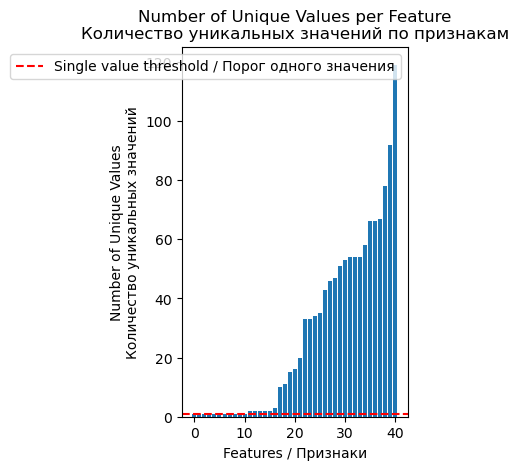

In [24]:
# График количества уникальных значений
plt.subplot(1, 2, 1)
unique_counts = X.nunique().sort_values()
plt.bar(range(len(unique_counts)), unique_counts)
plt.title('Number of Unique Values per Feature\nКоличество уникальных значений по признакам', fontsize=12)
plt.xlabel('Features / Признаки', fontsize=10)
plt.ylabel('Number of Unique Values\nКоличество уникальных значений', fontsize=10)
plt.axhline(y=1, color='r', linestyle='--', label='Single value threshold / Порог одного значения')
plt.legend()

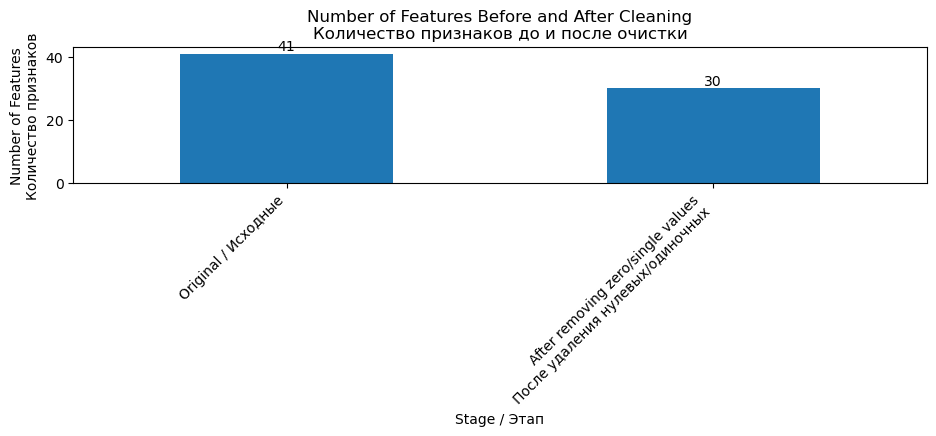

In [25]:
# Визуализация изменения количества признаков
plt.figure(figsize=(10, 5))
feature_counts = pd.Series({
    'Original / Исходные': len(X.columns),
    'After removing zero/single values\nПосле удаления нулевых/одиночных': len(X_cleaned.columns)
})
feature_counts.plot(kind='bar')
plt.title('Number of Features Before and After Cleaning\nКоличество признаков до и после очистки', fontsize=12)
plt.xlabel('Stage / Этап', fontsize=10)
plt.ylabel('Number of Features\nКоличество признаков', fontsize=10)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(feature_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout(pad=3.0)
plt.show()

In [26]:
# 2. Correlation matrices before and after feature removal / Корреляционные матрицы до и после удаления признаков
print("\nAnalyzing feature correlations / Анализ корреляций признаков...")

# Обновляем X для дальнейшего использования
X = X_cleaned.copy()


Analyzing feature correlations / Анализ корреляций признаков...


In [27]:
# Находим сильно коррелирующие признаки
correlation_matrix_before = X.corr()
high_corr_features = set()
for i in range(len(correlation_matrix_before.columns)):
    for j in range(i):
        if abs(correlation_matrix_before.iloc[i, j]) > 0.85:
            colname = correlation_matrix_before.columns[i]
            high_corr_features.add(colname)

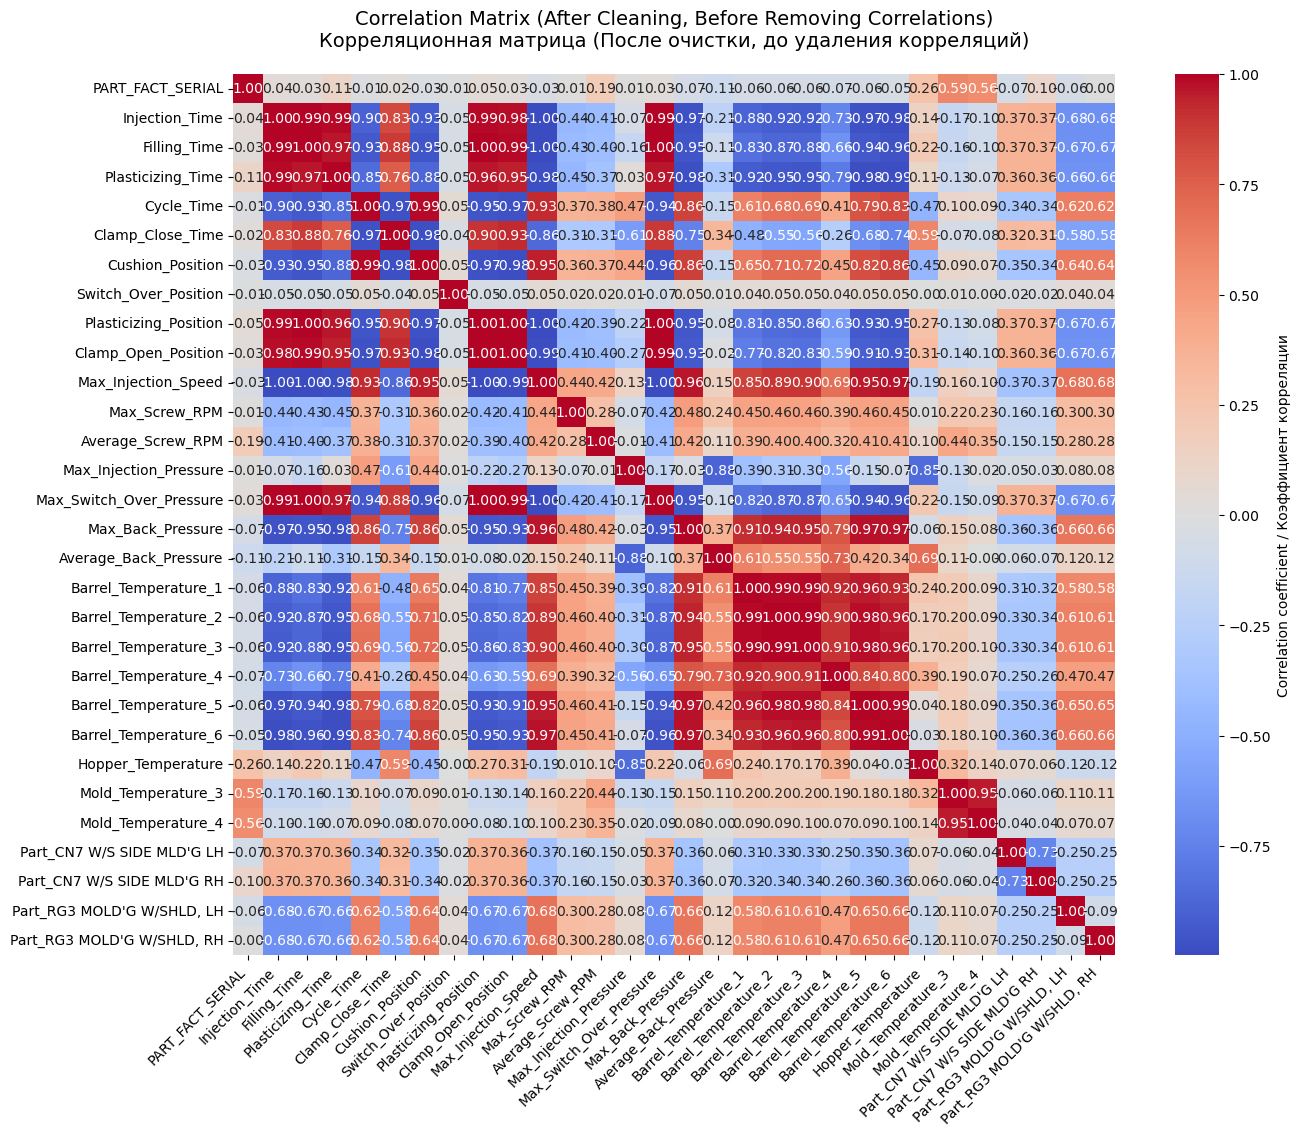

In [28]:
# Матрица корреляции до удаления сильно коррелирующих признаков
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_before, 
           cmap='coolwarm', 
           center=0, 
           annot=True,
           fmt='.2f',
           annot_kws={'size': 10},
           square=True,
           cbar_kws={'label': 'Correlation coefficient / Коэффициент корреляции'})
plt.title('Correlation Matrix (After Cleaning, Before Removing Correlations)\nКорреляционная матрица (После очистки, до удаления корреляций)', 
         fontsize=14, pad=20)

# Поворот меток на 45 градусов для лучшей читаемости
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(pad=3.0)
plt.show()

In [29]:
# Удаляем сильно коррелирующие признаки
X_corr = X.drop(columns=high_corr_features)
print(f"\nRemoved {len(high_corr_features)} highly correlated features / Удалено {len(high_corr_features)} сильно коррелирующих признаков")
print("Removed correlated features / Удаленные коррелирующие признаки:", high_corr_features)


Removed 19 highly correlated features / Удалено 19 сильно коррелирующих признаков
Removed correlated features / Удаленные коррелирующие признаки: {'Barrel_Temperature_2', 'Plasticizing_Time', 'Max_Injection_Speed', 'Plasticizing_Position', 'Clamp_Open_Position', 'Cushion_Position', 'Barrel_Temperature_1', 'Max_Back_Pressure', 'Mold_Temperature_4', 'Hopper_Temperature', 'Barrel_Temperature_5', 'Max_Switch_Over_Pressure', 'Clamp_Close_Time', 'Cycle_Time', 'Barrel_Temperature_6', 'Filling_Time', 'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Average_Back_Pressure'}


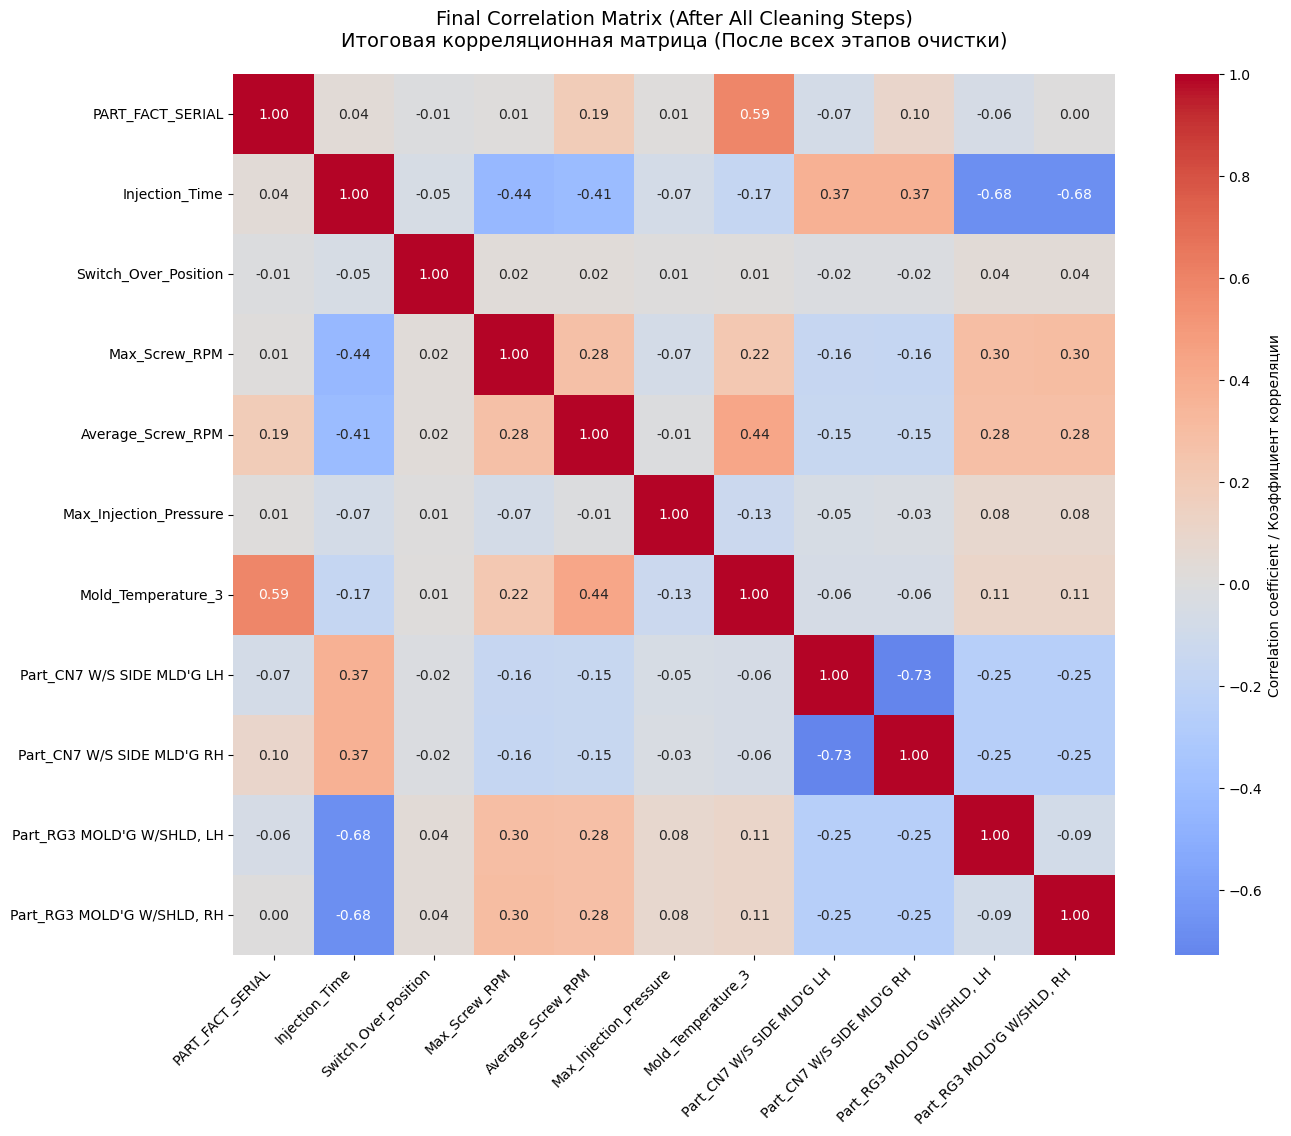

In [30]:
# Матрица корреляции после удаления сильно коррелирующих признаков
plt.figure(figsize=(15, 12))
correlation_matrix_after = X_corr.corr()
sns.heatmap(correlation_matrix_after, 
           cmap='coolwarm', 
           center=0, 
           annot=True,
           fmt='.2f',
           annot_kws={'size': 10},
           square=True,
           cbar_kws={'label': 'Correlation coefficient / Коэффициент корреляции'})
plt.title('Final Correlation Matrix (After All Cleaning Steps)\nИтоговая корреляционная матрица (После всех этапов очистки)', 
         fontsize=14, pad=20)

# Поворот меток на 45 градусов для лучшей читаемости
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(pad=3.0)
plt.show()

In [31]:
# Добавляем информацию о сильных корреляциях
print("\nStrong correlations (|correlation| > 0.5) / Сильные корреляции (|корреляция| > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix_after.columns)):
    for j in range(i):
        corr = correlation_matrix_after.iloc[i, j]
        if abs(corr) > 0.5:
            feature1 = correlation_matrix_after.columns[i]
            feature2 = correlation_matrix_after.columns[j]
            strong_correlations.append({
                'Feature 1': feature1,
                'Feature 2': feature2,
                'Correlation': corr
            })



Strong correlations (|correlation| > 0.5) / Сильные корреляции (|корреляция| > 0.5):


In [32]:
# Сортируем корреляции по абсолютному значению
strong_correlations.sort(key=lambda x: abs(x['Correlation']), reverse=True)

In [33]:
# Выводим информацию о сильных корреляциях
for corr in strong_correlations:
    print(f"{corr['Feature 1']} -- {corr['Feature 2']}: {corr['Correlation']:.3f}")

Part_CN7 W/S SIDE MLD'G RH -- Part_CN7 W/S SIDE MLD'G LH: -0.728
Part_RG3 MOLD'G W/SHLD, LH -- Injection_Time: -0.675
Part_RG3 MOLD'G W/SHLD, RH -- Injection_Time: -0.675
Mold_Temperature_3 -- PART_FACT_SERIAL: 0.586


In [34]:
# Обновляем X для дальнейшего использования
X = X_corr.copy()
# Обновляем X_scaled
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

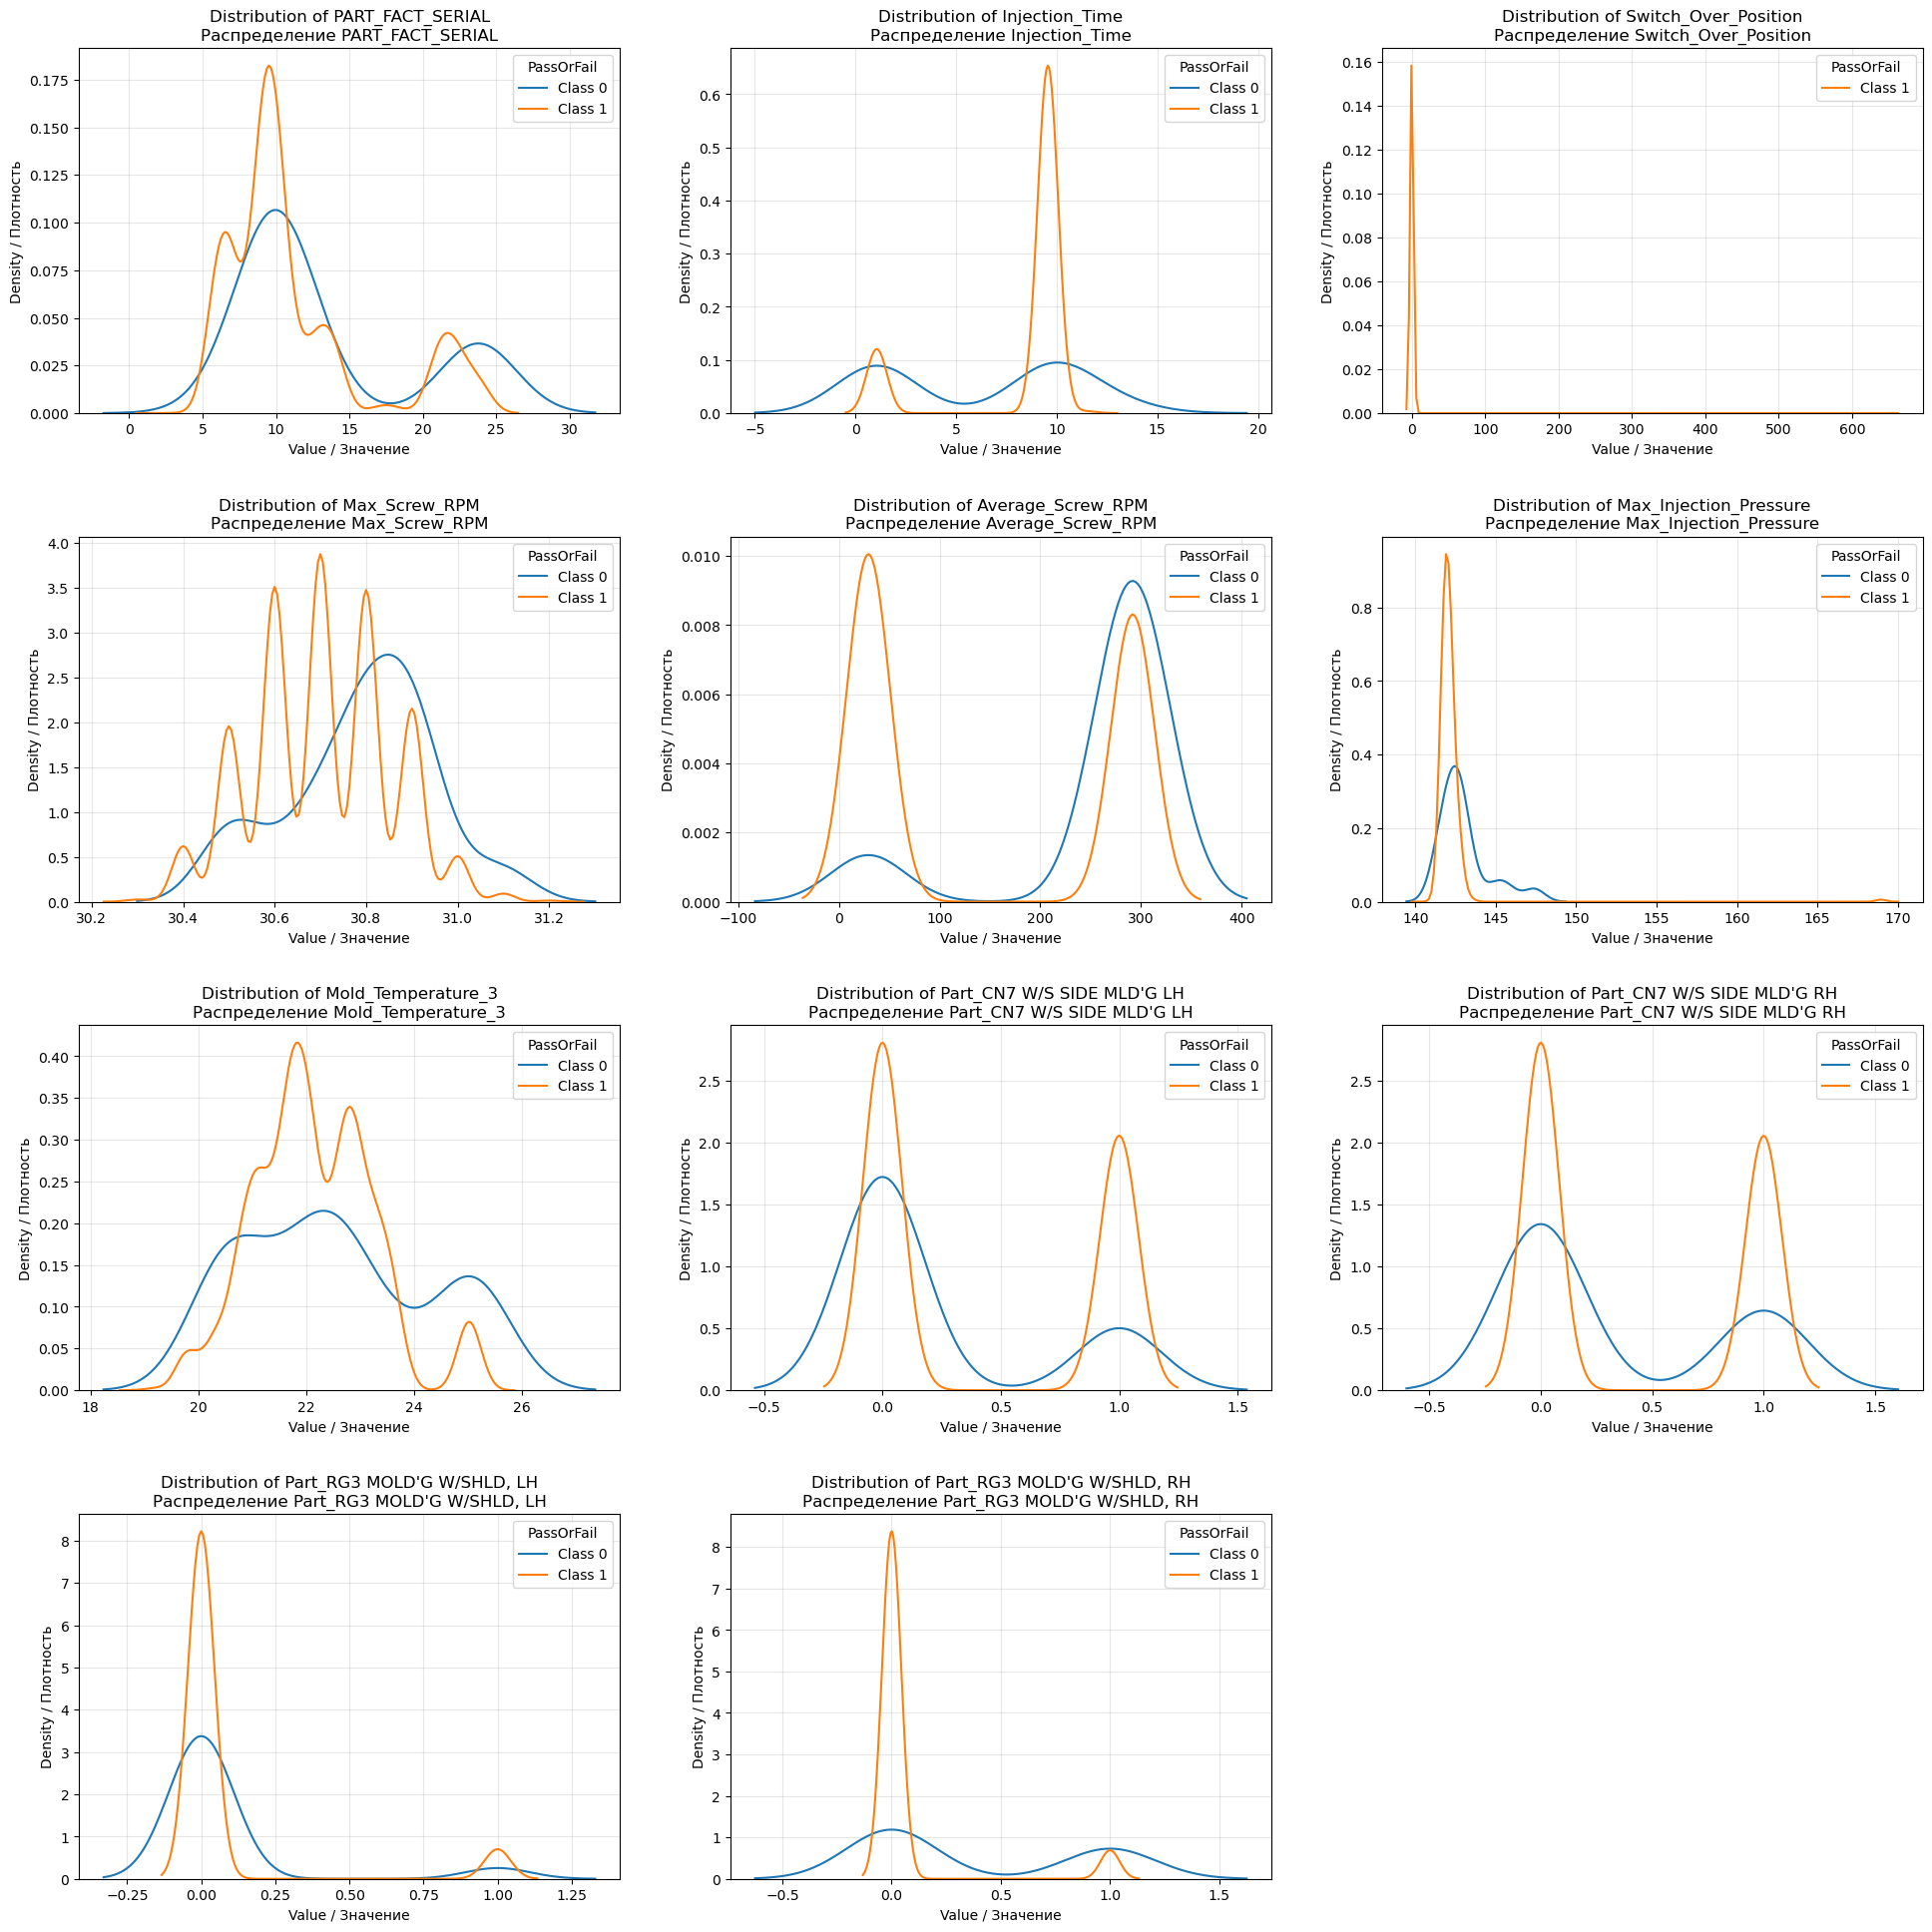

In [35]:
# 3. Feature distributions / Распределение признаков
n_features = len(X.columns)
n_rows = (n_features + 2) // 3  # Распределяем графики по 3 в ряд
plt.figure(figsize=(20, 5*n_rows))

for i, column in enumerate(X.columns):
    plt.subplot(n_rows, 3, i+1)
    # Создаем отдельные графики для каждого класса
    for label in [0, 1]:
        data = X[column][y == label]
        sns.kdeplot(data=data, label=f'Class {label}')
    
    plt.title(f'Distribution of {column}\nРаспределение {column}', fontsize=12)
    plt.xlabel('Value / Значение', fontsize=10)
    plt.ylabel('Density / Плотность', fontsize=10)
    plt.legend(title='PassOrFail')
    plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()


Создание boxplot для признаков...


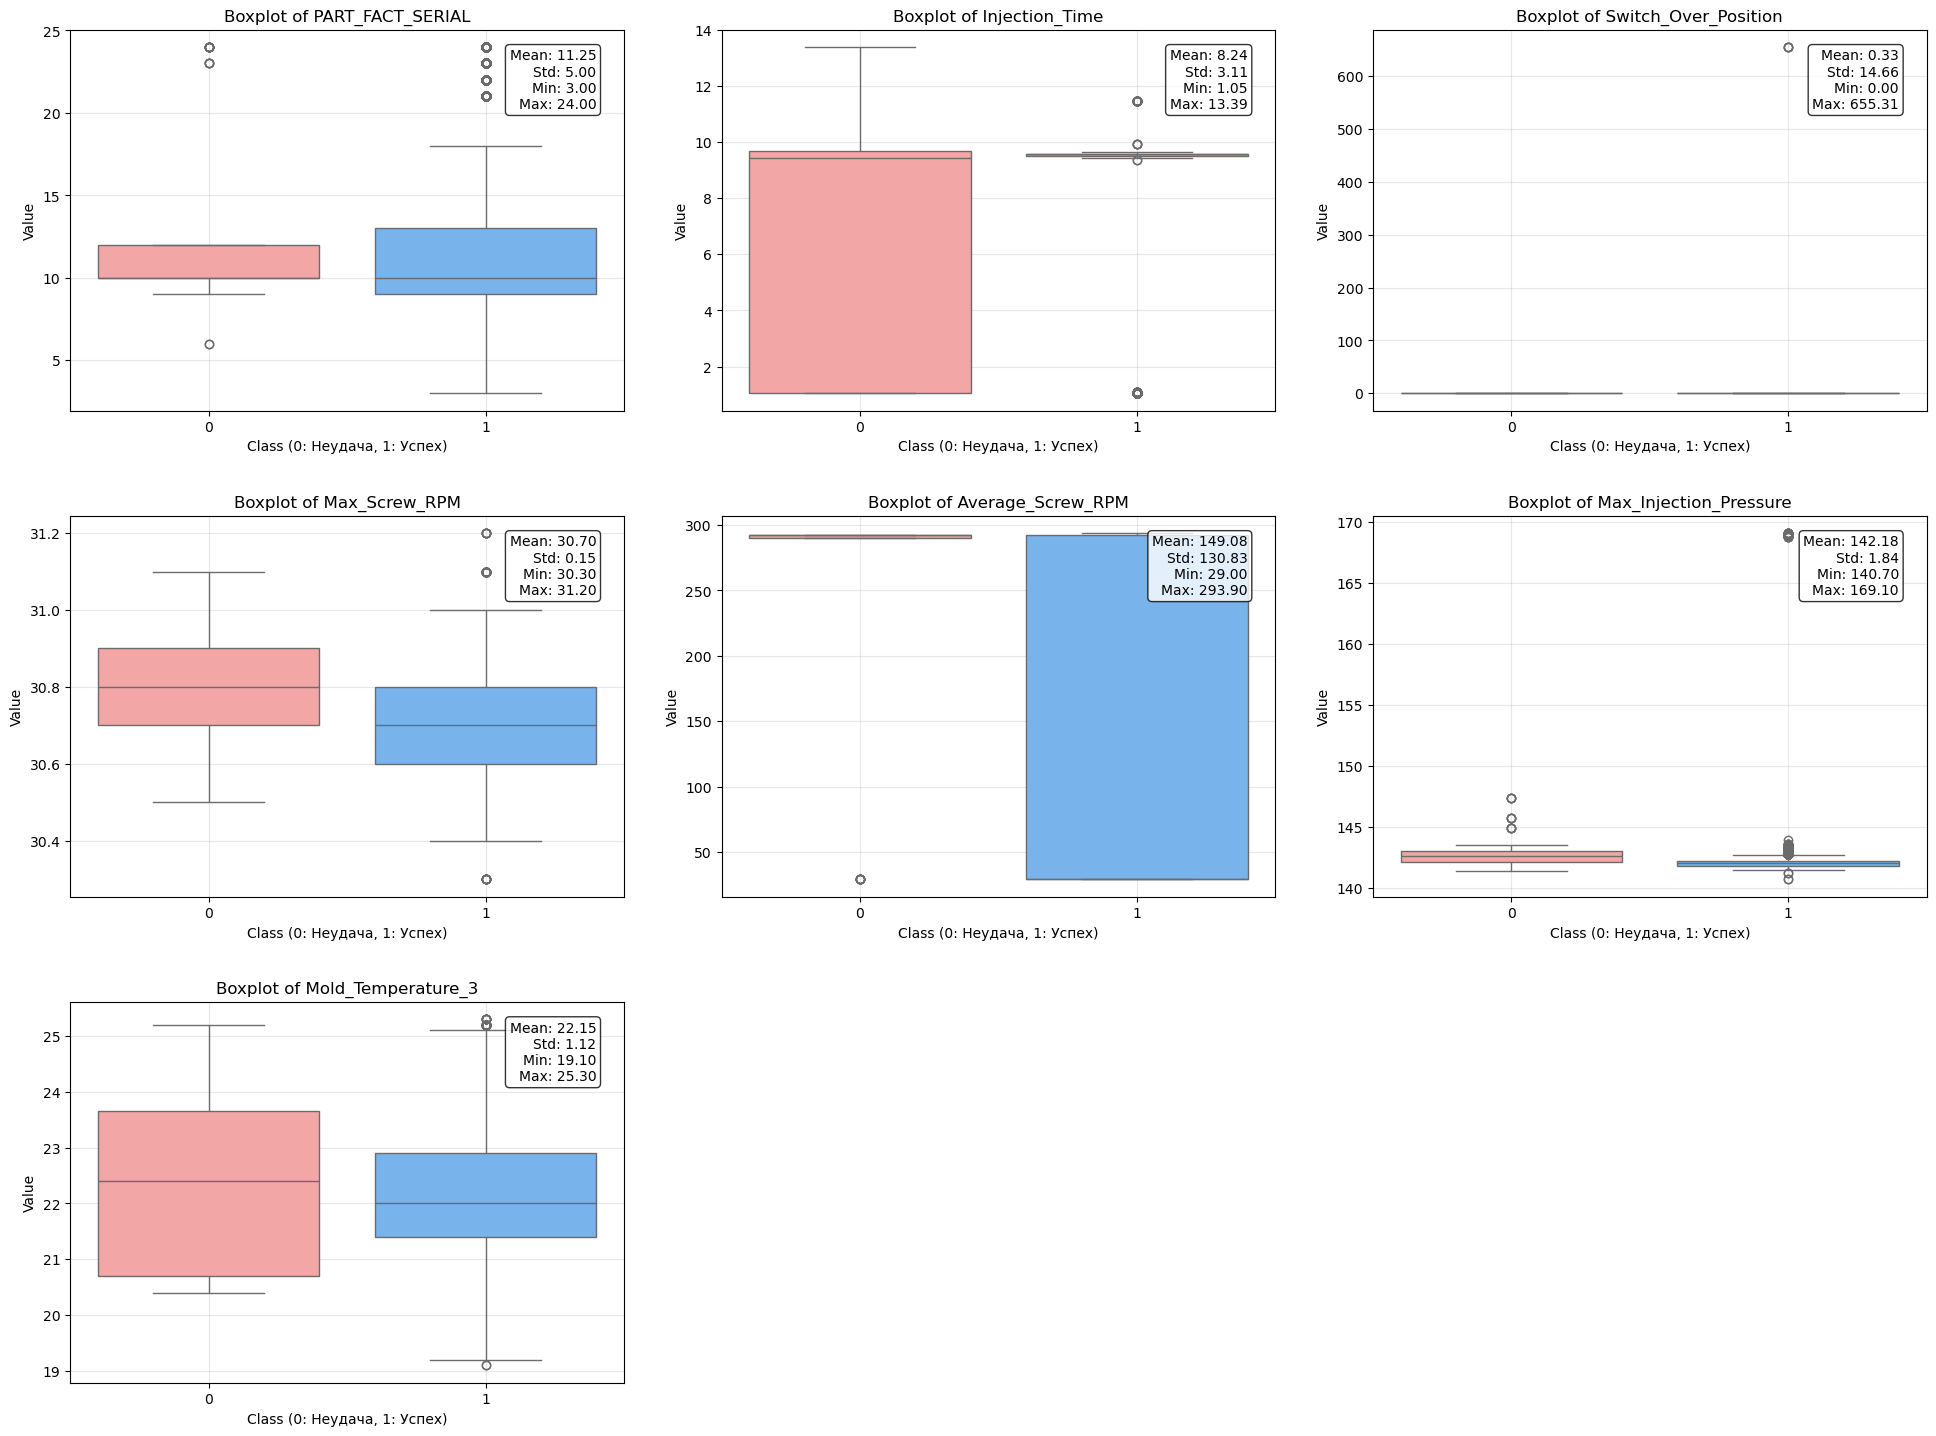

Boxplot графики сохранены в results/feature_boxplots.png


In [36]:
# 4. Feature boxplots / Boxplot для каждого признака
print("\nСоздание boxplot для признаков...")

# Получаем только числовые колонки для boxplot
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
n_numeric = len(numeric_features)
n_rows = (n_numeric + 2) // 3  # Распределяем графики по 3 в ряд

plt.figure(figsize=(20, 5*n_rows))

for i, column in enumerate(numeric_features):
    plt.subplot(n_rows, 3, i+1)
    
    # Создаем DataFrame для текущего признака
    plot_data = pd.DataFrame({
        'value': X[column],
        'class': y
    })
    
    # Создаем boxplot с разными цветами для классов
    sns.boxplot(x='class', y='value', data=plot_data, 
                palette=['#ff9999', '#66b3ff'])
    
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.xlabel('Class (0: Неудача, 1: Успех)', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    
    # Добавляем статистику
    stats = X[column].describe()
    stats_text = f'Mean: {stats["mean"]:.2f}\n'
    stats_text += f'Std: {stats["std"]:.2f}\n'
    stats_text += f'Min: {stats["min"]:.2f}\n'
    stats_text += f'Max: {stats["max"]:.2f}'
    
    plt.text(0.95, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Добавляем сетку для лучшей читаемости
    plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()
plt.savefig('results/feature_boxplots.png', dpi=300, bbox_inches='tight')
plt.close()

print("Boxplot графики сохранены в results/feature_boxplots.png")

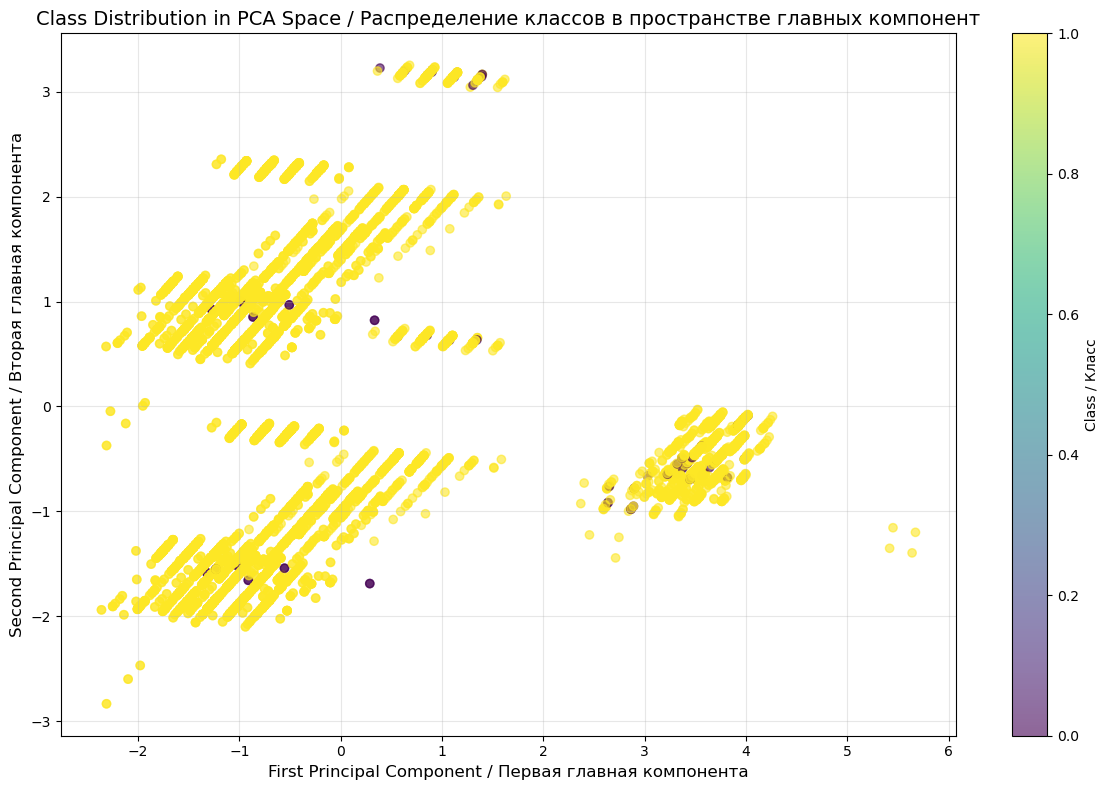

In [37]:
# 5. PCA scatter plot / Scatter plot для главных компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('Class Distribution in PCA Space / Распределение классов в пространстве главных компонент', fontsize=14)
plt.xlabel('First Principal Component / Первая главная компонента', fontsize=12)
plt.ylabel('Second Principal Component / Вторая главная компонента', fontsize=12)
plt.colorbar(scatter, label='Class / Класс')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

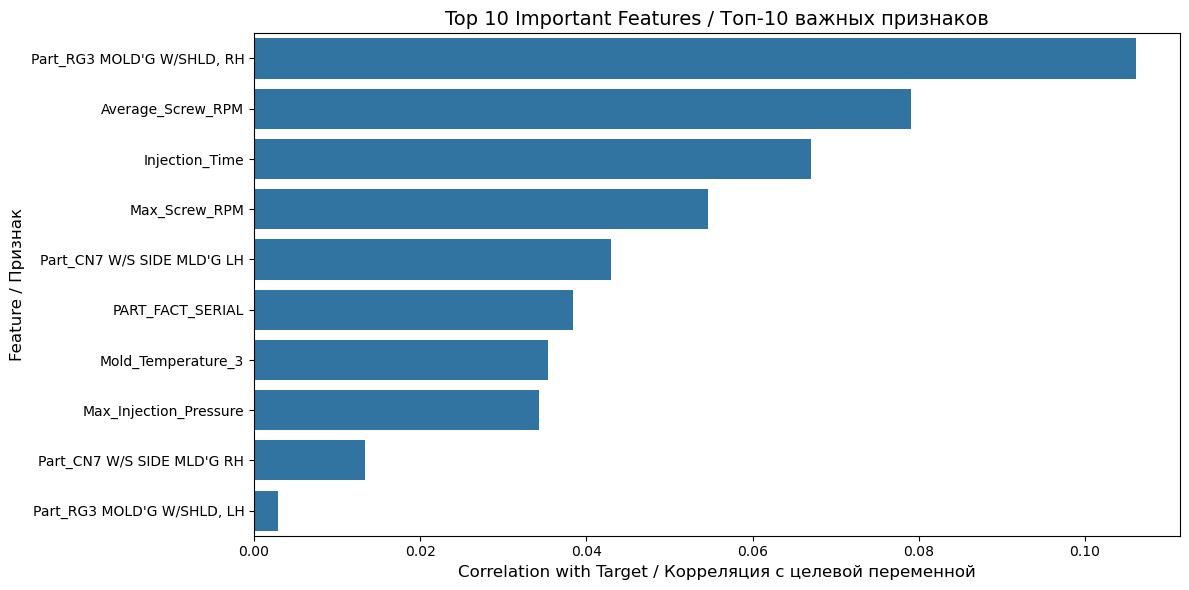

In [38]:
# 6. Feature importance / Важность признаков
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': [abs(X[col].corr(pd.Series(y))) for col in X.columns]
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features / Топ-10 важных признаков', fontsize=14)
plt.xlabel('Correlation with Target / Корреляция с целевой переменной', fontsize=12)
plt.ylabel('Feature / Признак', fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
# 7. Missing values distribution / Распределение пропущенных значений
plt.figure(figsize=(12, 6))
missing_values = df_filtered.isnull().sum()
missing_values = missing_values[missing_values > 0]
if len(missing_values) > 0:
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.title('Missing Values Distribution / Распределение пропущенных значений', fontsize=14)
    plt.xlabel('Feature / Признак', fontsize=12)
    plt.ylabel('Number of Missing Values / Количество пропущенных значений', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>


Анализ распределения выбросов...


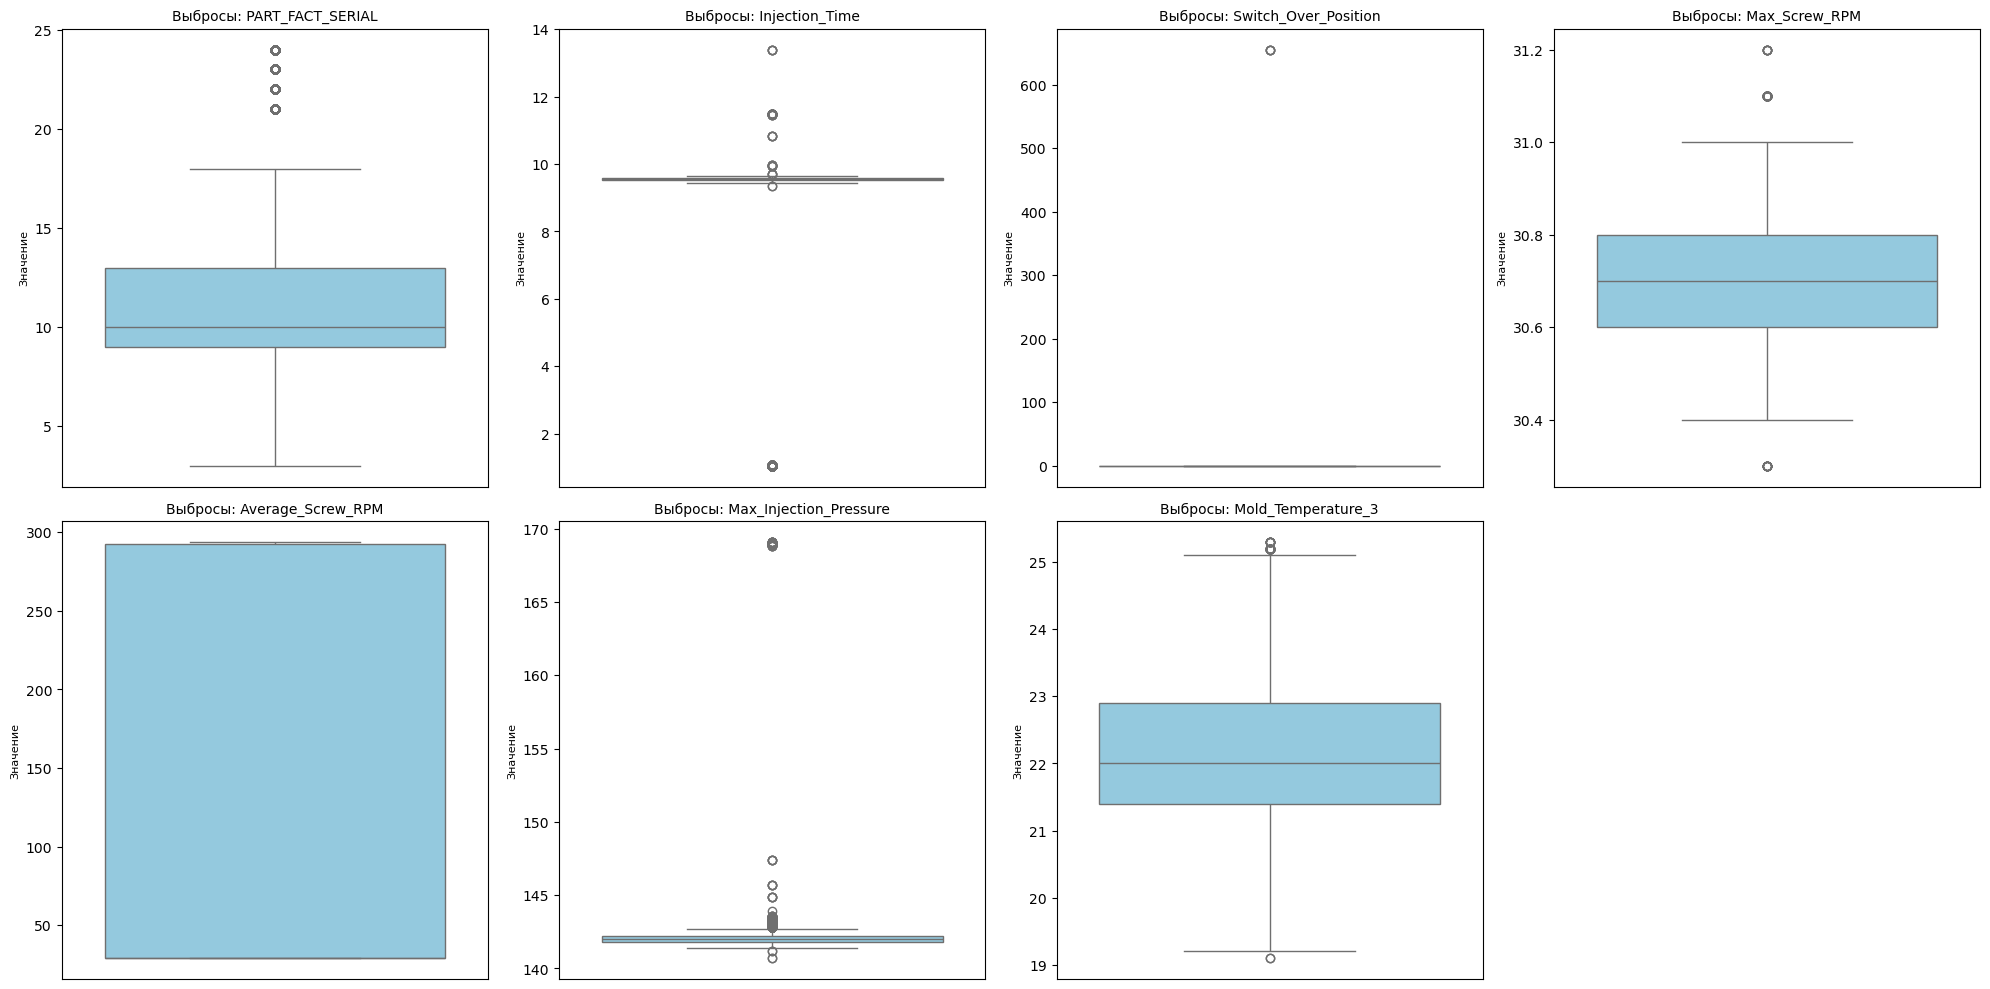

In [40]:
# 8. Outliers distribution / Распределение выбросов
print("\nАнализ распределения выбросов...")

# Получаем только числовые признаки
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
n_numeric = len(numeric_features)
n_rows = (n_numeric + 3) // 4  # 4 графика в ряд

plt.figure(figsize=(20, 5*n_rows))
for i, column in enumerate(numeric_features):
    plt.subplot(n_rows, 4, i+1)
    sns.boxplot(y=X[column], color='skyblue')
    plt.title(f'Выбросы: {column}', fontsize=10)
    plt.xticks([])  # Убираем метки по оси X
    plt.ylabel('Значение', fontsize=8)
plt.tight_layout()
plt.show()
plt.savefig('results/outliers_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

In [41]:
# Анализ и обработка выбросов
print("\nAnalyzing and handling outliers / Анализ и обработка выбросов...")

# Создаем копию данных для сравнения разных методов обработки выбросов
X_original = X.copy()


Analyzing and handling outliers / Анализ и обработка выбросов...


In [42]:
# Функция для обнаружения выбросов методом IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


In [43]:
# Функция для обнаружения выбросов методом z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return abs(z_scores) > threshold

In [44]:
# Анализ выбросов только для числовых признаков
outliers_summary = pd.DataFrame(index=numeric_features)
outliers_summary['IQR_outliers'] = [detect_outliers_iqr(X[col]).sum() for col in numeric_features]
outliers_summary['Zscore_outliers'] = [detect_outliers_zscore(X[col]).sum() for col in numeric_features]
outliers_summary['Total_samples'] = len(X)
outliers_summary['IQR_percentage'] = (outliers_summary['IQR_outliers'] / len(X) * 100).round(2)
outliers_summary['Zscore_percentage'] = (outliers_summary['Zscore_outliers'] / len(X) * 100).round(2)

print("\nСводка по выбросам:")
print(outliers_summary)


Сводка по выбросам:
                        IQR_outliers  Zscore_outliers  Total_samples  \
PART_FACT_SERIAL                1151                0           7992   
Injection_Time                  1318                0           7992   
Switch_Over_Position               4                4           7992   
Max_Screw_RPM                     66                6           7992   
Average_Screw_RPM                  0                0           7992   
Max_Injection_Pressure           370               36           7992   
Mold_Temperature_3                70                0           7992   

                        IQR_percentage  Zscore_percentage  
PART_FACT_SERIAL                 14.40               0.00  
Injection_Time                   16.49               0.00  
Switch_Over_Position              0.05               0.05  
Max_Screw_RPM                     0.83               0.08  
Average_Screw_RPM                 0.00               0.00  
Max_Injection_Pressure            4.63    

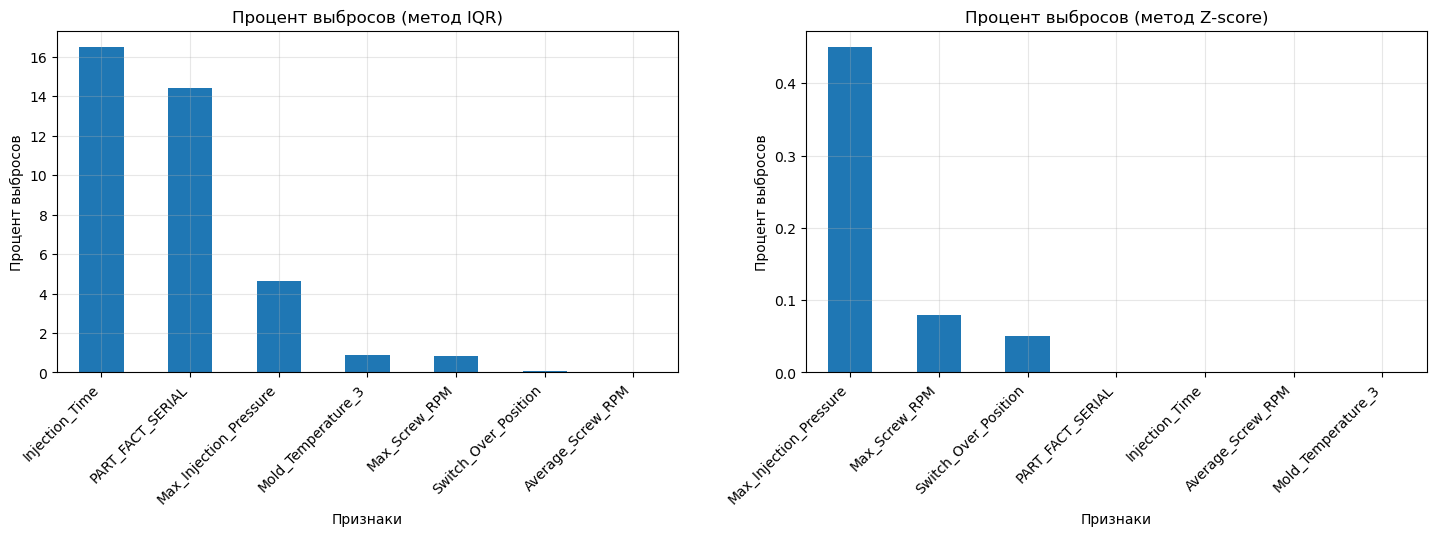

In [45]:
# Визуализация распределения выбросов
plt.figure(figsize=(15, 6))

# График процента выбросов по методу IQR
plt.subplot(1, 2, 1)
outliers_summary['IQR_percentage'].sort_values(ascending=False).plot(kind='bar')
plt.title('Процент выбросов (метод IQR)', fontsize=12)
plt.xlabel('Признаки', fontsize=10)
plt.ylabel('Процент выбросов', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# График процента выбросов по методу Z-score
plt.subplot(1, 2, 2)
outliers_summary['Zscore_percentage'].sort_values(ascending=False).plot(kind='bar')
plt.title('Процент выбросов (метод Z-score)', fontsize=12)
plt.xlabel('Признаки', fontsize=10)
plt.ylabel('Процент выбросов', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()
plt.savefig('results/outliers_percentage.png', dpi=300, bbox_inches='tight')
plt.close()

In [46]:
# Обработка выбросов методом винзоризации
from scipy.stats import mstats

print("\nОбработка выбросов методом винзоризации...")
X_winsorized = X.copy()
for column in numeric_features:
    X_winsorized[column] = mstats.winsorize(X_winsorized[column], limits=[0.05, 0.05])


Обработка выбросов методом винзоризации...


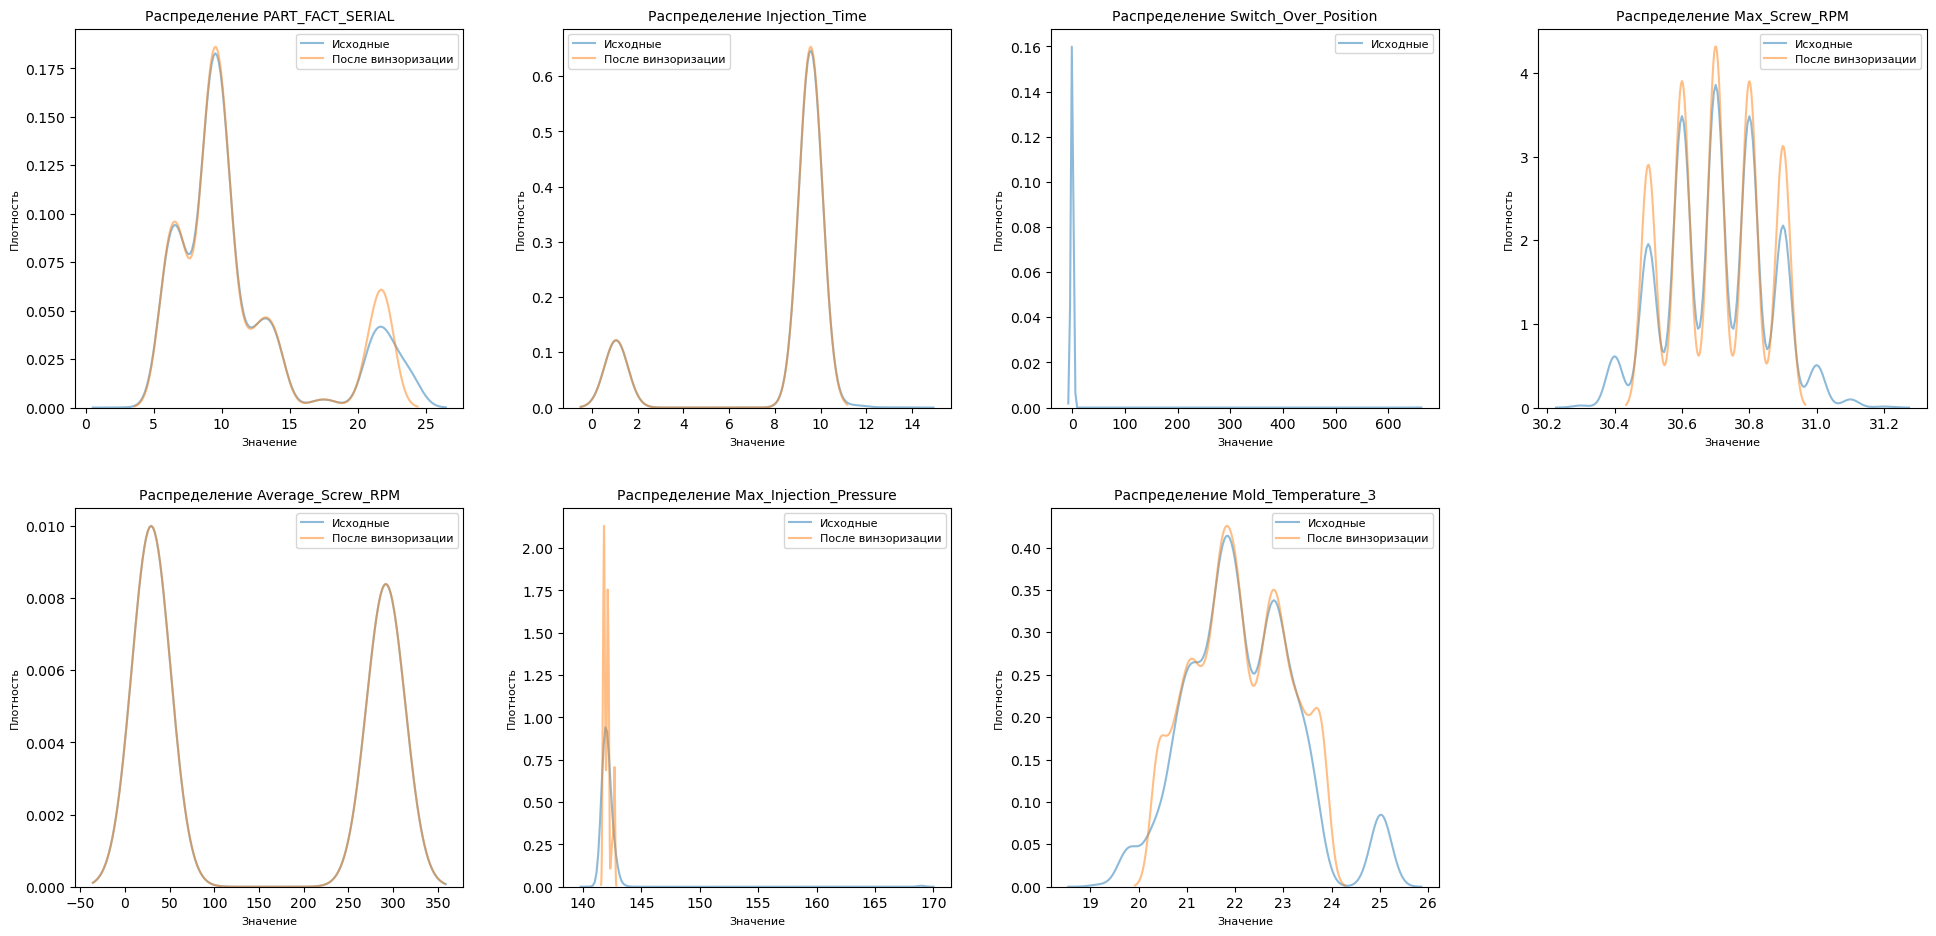

In [47]:
# Сравнение распределений до и после обработки выбросов
plt.figure(figsize=(20, 5*n_rows))

for i, column in enumerate(numeric_features):
    plt.subplot(n_rows, 4, i+1)
    
    # Исходное распределение
    sns.kdeplot(data=X[column], label='Исходные', alpha=0.5)
    # После винзоризации
    sns.kdeplot(data=X_winsorized[column], label='После винзоризации', alpha=0.5)
    
    plt.title(f'Распределение {column}', fontsize=10)
    plt.xlabel('Значение', fontsize=8)
    plt.ylabel('Плотность', fontsize=8)
    plt.legend(fontsize=8)
    
plt.tight_layout(pad=3.0)
plt.show()
plt.savefig('results/distributions_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

In [48]:
# Сравнение статистик до и после обработки выбросов
stats_comparison = pd.DataFrame()
for column in numeric_features:
    original_stats = X[column].describe()
    winsorized_stats = X_winsorized[column].describe()
    
    stats_comparison[f'{column}_Original'] = original_stats
    stats_comparison[f'{column}_Winsorized'] = winsorized_stats

print("\nСравнение статистик до и после винзоризации:")
print(stats_comparison)


Сравнение статистик до и после винзоризации:
       PART_FACT_SERIAL_Original  PART_FACT_SERIAL_Winsorized  \
count                7992.000000                  7992.000000   
mean                   11.251126                    11.181306   
std                     5.004303                     4.837133   
min                     3.000000                     6.000000   
25%                     9.000000                     9.000000   
50%                    10.000000                    10.000000   
75%                    13.000000                    13.000000   
max                    24.000000                    22.000000   

       Injection_Time_Original  Injection_Time_Winsorized  \
count              7992.000000                7992.000000   
mean                  8.241201                   8.228766   
std                   3.105195                   3.095557   
min                   1.050000                   1.060000   
25%                   9.520000                   9.520000   
50

In [49]:
# Сохраняем статистики в файл
stats_comparison.to_csv('results/outliers_statistics.csv')
print("\nСтатистики сохранены в results/outliers_statistics.csv")


Статистики сохранены в results/outliers_statistics.csv


In [50]:
# Обновляем X для дальнейшего использования, используя винзоризированные данные
X = X_winsorized.copy()
# Обновляем X_scaled только для числовых признаков
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

In [51]:
# Создаем базовую модель Logistic Regression с отключенной параллельностью
baseline_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='auto',
    n_jobs=-1  # Отключаем параллельную обработку
)

In [52]:
# Определяем методы балансировки без параллельной обработки
sampling_methods = {
    'SMOTE': SMOTE(
        random_state=42,
        n_jobs=None,  # Отключаем параллельную обработку
        k_neighbors=5
    ),
    'ADASYN': ADASYN(
        random_state=42,
        n_jobs=None,  # Отключаем параллельную обработку
        n_neighbors=5
    ),
    'RandomUnderSampler': RandomUnderSampler(
        random_state=42
    )
}

In [53]:
# Создаем DataFrame для хранения результатов
baseline_results = []

In [54]:
# Сначала оцениваем модель без балансировки
print("\nОценка Logistic Regression без балансировки...")
try:
    # Обучаем модель
    baseline_model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred_train = baseline_model.predict(X_train)
    y_pred_test = baseline_model.predict(X_test)
    
    # Вычисляем метрики
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    
    # Сохраняем результаты
    baseline_results.append({
        'sampling': 'None',
        'f1_train': f1_train,
        'f1_test': f1_test,
        'precision_train': precision_train,
        'precision_test': precision_test,
        'recall_train': recall_train,
        'recall_test': recall_test
    })
    
except Exception as e:
    print(f"Ошибка при оценке Logistic Regression без балансировки: {str(e)}")


Оценка Logistic Regression без балансировки...


In [55]:
# Оцениваем модель с разными методами балансировки
for sampler_name, sampler in sampling_methods.items():
    try:
        print(f"\nОценка Logistic Regression с {sampler_name}...")
        
        # Проверяем размерность данных
        print(f"Размерность X_train: {X_train.shape}")
        print(f"Размерность y_train: {y_train.shape}")
        
        # Проверяем количество классов
        unique_classes = np.unique(y_train)
        print(f"Уникальные классы в y_train: {unique_classes}")
        
        # Применяем балансировку с обработкой ошибок
        try:
            X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
            print(f"Размерность после балансировки - X: {X_train_balanced.shape}, y: {y_train_balanced.shape}")
        except Exception as e:
            print(f"Ошибка при балансировке данных: {str(e)}")
            continue
        
        # Создаем и обучаем модель
        model_balanced = clone(baseline_model)
        model_balanced.fit(X_train_balanced, y_train_balanced)
        
        # Получаем предсказания
        y_pred_train = model_balanced.predict(X_train)
        y_pred_test = model_balanced.predict(X_test)
        
        # Вычисляем метрики
        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')
        precision_train = precision_score(y_train, y_pred_train, average='weighted')
        precision_test = precision_score(y_test, y_pred_test, average='weighted')
        recall_train = recall_score(y_train, y_pred_train, average='weighted')
        recall_test = recall_score(y_test, y_pred_test, average='weighted')
        
        print(f"Метрики для {sampler_name}:")
        print(f"F1-score (train/test): {f1_train:.3f}/{f1_test:.3f}")
        print(f"Precision (train/test): {precision_train:.3f}/{precision_test:.3f}")
        print(f"Recall (train/test): {recall_train:.3f}/{recall_test:.3f}")
        
        # Сохраняем результаты
        baseline_results.append({
            'sampling': sampler_name,
            'f1_train': f1_train,
            'f1_test': f1_test,
            'precision_train': precision_train,
            'precision_test': precision_test,
            'recall_train': recall_train,
            'recall_test': recall_test
        })
        
    except Exception as e:
        print(f"Ошибка при оценке Logistic Regression с {sampler_name}: {str(e)}")
        print("Детали ошибки:", e.__class__.__name__)
        continue



Оценка Logistic Regression с SMOTE...
Размерность X_train: (5594, 41)
Размерность y_train: (5594,)
Уникальные классы в y_train: [0 1]


  File "C:\Users\User\anaconda3\envs\senior_level\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Размерность после балансировки - X: (11088, 41), y: (11088,)
Метрики для SMOTE:
F1-score (train/test): 0.937/0.935
Precision (train/test): 0.992/0.991
Recall (train/test): 0.896/0.892

Оценка Logistic Regression с ADASYN...
Размерность X_train: (5594, 41)
Размерность y_train: (5594,)
Уникальные классы в y_train: [0 1]
Размерность после балансировки - X: (11101, 41), y: (11101,)
Метрики для ADASYN:
F1-score (train/test): 0.937/0.935
Precision (train/test): 0.992/0.991
Recall (train/test): 0.896/0.891

Оценка Logistic Regression с RandomUnderSampler...
Размерность X_train: (5594, 41)
Размерность y_train: (5594,)
Уникальные классы в y_train: [0 1]
Размерность после балансировки - X: (100, 41), y: (100,)
Метрики для RandomUnderSampler:
F1-score (train/test): 0.912/0.908
Precision (train/test): 0.991/0.990
Recall (train/test): 0.853/0.846


In [56]:
# Преобразуем результаты в DataFrame
baseline_results_df = pd.DataFrame(baseline_results)

In [57]:
# Сохраняем результаты базовой модели
baseline_results_df.to_csv(f'results/baseline_results_{timestamp}.csv', index=False)

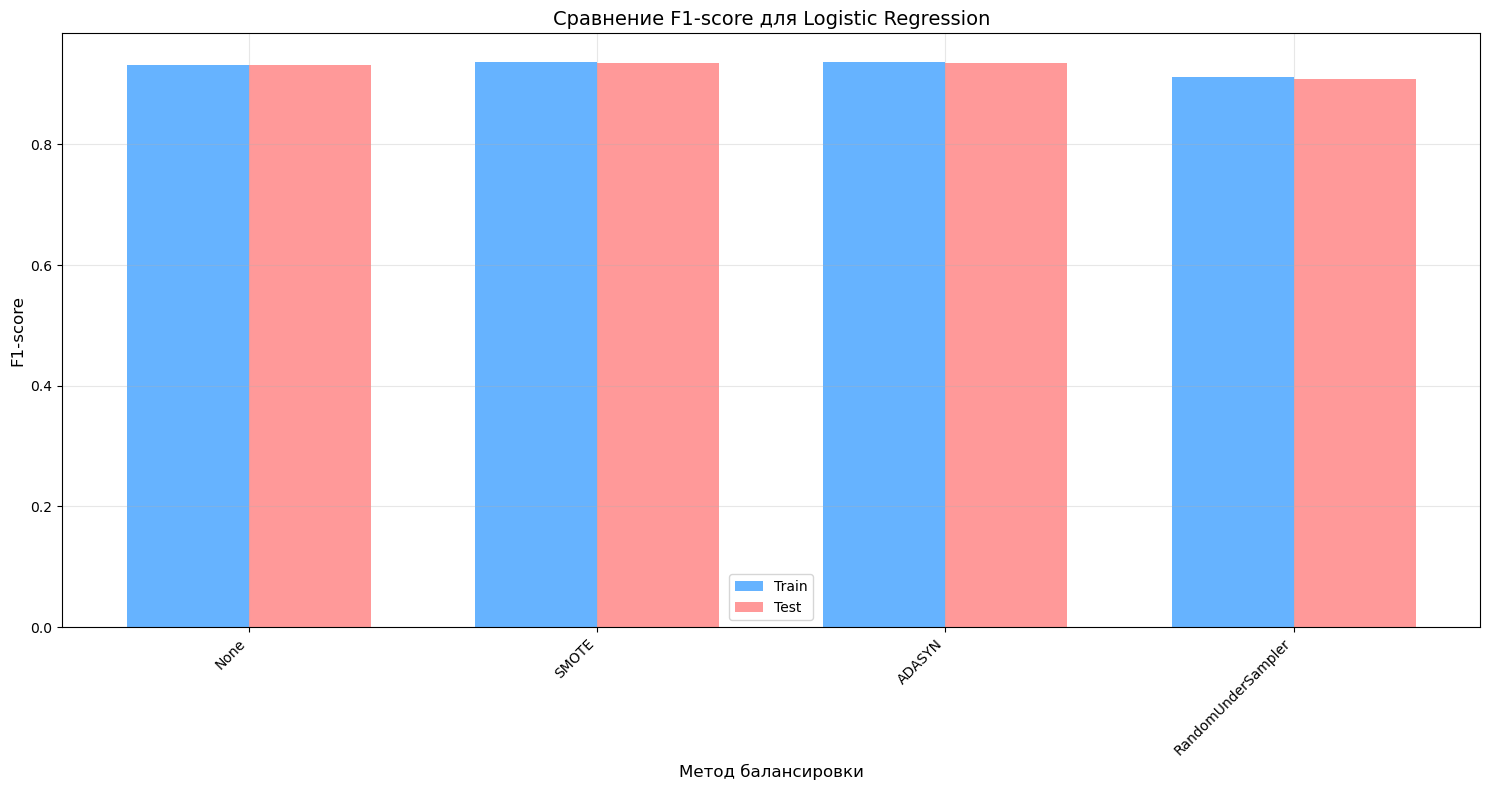

In [58]:
# Визуализация результатов базовой модели
plt.figure(figsize=(15, 8))
x = np.arange(len(baseline_results_df))
width = 0.35

plt.bar(x - width/2, baseline_results_df['f1_train'], width, label='Train', color='#66b3ff')
plt.bar(x + width/2, baseline_results_df['f1_test'], width, label='Test', color='#ff9999')

plt.title('Сравнение F1-score для Logistic Regression', fontsize=14)
plt.xlabel('Метод балансировки', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(x, baseline_results_df['sampling'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('results/baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

In [59]:
# Находим лучший метод балансировки
best_result = baseline_results_df.loc[baseline_results_df['f1_test'].idxmax()]
print("\nЛучший результат для базовой модели:")
print(f"Метод балансировки: {best_result['sampling']}")
print(f"F1-score (test): {best_result['f1_test']:.3f}")
print(f"Precision (test): {best_result['precision_test']:.3f}")
print(f"Recall (test): {best_result['recall_test']:.3f}")



Лучший результат для базовой модели:
Метод балансировки: SMOTE
F1-score (test): 0.935
Precision (test): 0.991
Recall (test): 0.892


In [60]:
# Сохраняем лучшую базовую модель
if best_result['sampling'] != 'None':
    best_sampler = sampling_methods[best_result['sampling']]
    X_train_balanced, y_train_balanced = best_sampler.fit_resample(X_train, y_train)
    baseline_model.fit(X_train_balanced, y_train_balanced)
    with open(f'results/baseline_sampler_{timestamp}.pkl', 'wb') as f:
        pickle.dump(best_sampler, f)
else:
    baseline_model.fit(X_train, y_train)

with open(f'results/baseline_model_{timestamp}.pkl', 'wb') as f:
    pickle.dump(baseline_model, f)

print(f"\nБазовая модель сохранена в results/baseline_model_{timestamp}.pkl")


Базовая модель сохранена в results/baseline_model_20250504_100945.pkl


In [61]:
# ===================================================
# Создание и оценка моделей
# ===================================================
print("\nСоздание и оценка моделей...")

# Изменяем параметры для других моделей
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=None),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_jobs=None),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=None),
    'CatBoost': CatBoostClassifier(random_state=42, thread_count=1, verbose=False),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42, n_jobs=None),
    'Bagging': BaggingClassifier(random_state=42, n_jobs=None),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42)
}


Создание и оценка моделей...


In [62]:
# Оптимизированные параметры для балансировки
sampling_params = {
    'SMOTE': {
        'k_neighbors': [3, 5],
        'sampling_strategy': ['auto', 0.5]
    },
    'ADASYN': {
        'n_neighbors': [3, 5],
        'sampling_strategy': ['auto', 0.5]
    },
    'RandomUnderSampler': {
        'sampling_strategy': ['auto', 0.5]
    }
}

In [63]:
# Оптимизированные параметры для моделей
model_params = {
    'Random Forest': {
        'n_estimators': [100, 200],  # Уменьшено количество деревьев
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']  # Убраны медленные ядра
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    }
}

In [64]:
def clean_feature_names_for_lightgbm(df):
    """Очищает названия признаков для LightGBM."""
    df_clean = df.copy()
    df_clean.columns = [str(col).replace(' ', '_').replace('(', '').replace(')', '').replace("'", '').replace('"', '') 
                       for col in df_clean.columns]
    return df_clean

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, sampling_name=None):
    try:
        print(f"\nОбучение модели {model_name}" + (f" с {sampling_name}" if sampling_name else ""))
        
        # Очищаем названия признаков для LightGBM
        if model_name == 'LightGBM':
            X_train = clean_feature_names_for_lightgbm(X_train)
            X_test = clean_feature_names_for_lightgbm(X_test)
        
        # Создаем пайплайн
        if sampling_name:
            pipeline = ImbPipeline([
                ('sampling', sampling_methods[sampling_name]),
                ('model', model)
            ])
        else:
            pipeline = model
        
        # Обучаем модель с отслеживанием времени
        start_time = time.time()
        pipeline.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Получаем предсказания
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Вычисляем метрики
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_prob)
        
        # Выводим результаты
        print(f"Время обучения: {training_time:.2f} сек")
        print(f"F1-score: {f1:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"ROC AUC: {roc_auc:.3f}")
        
        return {
            'model': model_name,
            'sampling': sampling_name if sampling_name else 'None',
            'training_time': training_time,
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'roc_auc': roc_auc,
            'model_object': pipeline
        }
    except Exception as e:
        print(f"Ошибка при обучении модели {model_name}: {str(e)}")
        return None

In [65]:
def find_best_sampler(model, X_train, y_train, X_test, y_test, model_name):
    best_score = 0
    best_sampler = None
    
    print(f"\nПоиск лучшего метода балансировки для {model_name}")
    
    # Очищаем названия признаков для LightGBM
    if model_name == 'LightGBM':
        X_train = clean_feature_names_for_lightgbm(X_train)
        X_test = clean_feature_names_for_lightgbm(X_test)
    
    for sampler_name, sampler in sampling_methods.items():
        try:
            print(f"\nТестирование {sampler_name}...")
            
            # Создаем пайплайн
            pipeline = ImbPipeline([
                ('sampling', sampler),
                ('model', model)
            ])
            
            # Обучаем модель
            start_time = time.time()
            pipeline.fit(X_train, y_train)
            training_time = time.time() - start_time
            
            # Получаем предсказания
            y_pred = pipeline.predict(X_test)
            y_prob = pipeline.predict_proba(X_test)[:, 1]
            
            # Вычисляем ROC AUC
            score = roc_auc_score(y_test, y_prob)
            
            print(f"Время обучения: {training_time:.2f} сек")
            print(f"ROC AUC: {score:.3f}")
            
            if score > best_score:
                best_score = score
                best_sampler = sampler_name
                print(f"Новый лучший метод балансировки: {sampler_name} (ROC AUC: {score:.3f})")
            
        except Exception as e:
            print(f"Ошибка при тестировании {sampler_name}: {str(e)}")
    
    return best_sampler, best_score

In [66]:
# ===================================================
# Выбор лучшего метода балансировки для каждой модели
# ===================================================
print("\nВыбор лучшего метода балансировки для каждой модели...")

# Оптимизированный процесс обучения и оценки моделей
print("\nНачало процесса обучения и оценки моделей...")

# Создаем DataFrame для хранения результатов
model_results = []


Выбор лучшего метода балансировки для каждой модели...

Начало процесса обучения и оценки моделей...


In [67]:
# Оцениваем каждую модель
for model_name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Оценка модели: {model_name}")
    print(f"{'='*50}")
    
    # Находим лучший метод балансировки для текущей модели
    best_sampler_name, best_score = find_best_sampler(model, X_train, y_train, X_test, y_test, model_name)
    
    # Обучаем и оцениваем модель с лучшим методом балансировки
    if best_sampler_name:
        result = train_and_evaluate_model(
            model, 
            X_train, 
            y_train, 
            X_test, 
            y_test, 
            model_name, 
            best_sampler_name
        )
    else:
        # Если не удалось найти подходящий метод балансировки, пробуем без балансировки
        result = train_and_evaluate_model(
            model, 
            X_train, 
            y_train, 
            X_test, 
            y_test, 
            model_name
        )
    
    if result:
        model_results.append(result)


Оценка модели: Random Forest

Поиск лучшего метода балансировки для Random Forest

Тестирование SMOTE...
Время обучения: 10.55 сек
ROC AUC: 0.963
Новый лучший метод балансировки: SMOTE (ROC AUC: 0.963)

Тестирование ADASYN...
Время обучения: 11.16 сек
ROC AUC: 0.947

Тестирование RandomUnderSampler...
Время обучения: 0.29 сек
ROC AUC: 0.958

Обучение модели Random Forest с SMOTE
Время обучения: 10.33 сек
F1-score: 0.994
Precision: 0.994
Recall: 0.994
ROC AUC: 0.963

Оценка модели: Gradient Boosting

Поиск лучшего метода балансировки для Gradient Boosting

Тестирование SMOTE...
Время обучения: 24.76 сек
ROC AUC: 0.943
Новый лучший метод балансировки: SMOTE (ROC AUC: 0.943)

Тестирование ADASYN...
Время обучения: 24.88 сек
ROC AUC: 0.959
Новый лучший метод балансировки: ADASYN (ROC AUC: 0.959)

Тестирование RandomUnderSampler...
Время обучения: 0.34 сек
ROC AUC: 0.939

Обучение модели Gradient Boosting с ADASYN
Время обучения: 25.03 сек
F1-score: 0.981
Precision: 0.989
Recall: 0.975
ROC

In [68]:
# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(model_results)

# Сохраняем результаты
results_df.to_csv(f'results/model_results_{timestamp}.csv', index=False)

In [69]:
# Выводим classification report для каждой модели
print("\n=== Classification Reports для всех моделей ===")
for result in model_results:
    print(f"\n{'='*50}")
    print(f"Модель: {result['model']}")
    print(f"Метод балансировки: {result['sampling']}")
    print(f"{'='*50}")
    
    # Получаем предсказания
    y_pred = result['model_object'].predict(X_test)
    
    # Выводим classification report
    print(classification_report(y_test, y_pred, target_names=['Неудача', 'Успех']))
    print(f"ROC AUC: {result['roc_auc']:.3f}")
    print(f"Время обучения: {result['training_time']:.2f} сек")


=== Classification Reports для всех моделей ===

Модель: Random Forest
Метод балансировки: SMOTE
              precision    recall  f1-score   support

     Неудача       0.71      0.57      0.63        21
       Успех       1.00      1.00      1.00      2377

    accuracy                           0.99      2398
   macro avg       0.85      0.78      0.81      2398
weighted avg       0.99      0.99      0.99      2398

ROC AUC: 0.963
Время обучения: 10.33 сек

Модель: Gradient Boosting
Метод балансировки: ADASYN
              precision    recall  f1-score   support

     Неудача       0.18      0.52      0.27        21
       Успех       1.00      0.98      0.99      2377

    accuracy                           0.97      2398
   macro avg       0.59      0.75      0.63      2398
weighted avg       0.99      0.97      0.98      2398

ROC AUC: 0.959
Время обучения: 25.03 сек

Модель: SVM
Метод балансировки: ADASYN
              precision    recall  f1-score   support

     Неудача     

In [70]:
# Находим лучшую модель
best_result = results_df.loc[results_df['roc_auc'].idxmax()]
print("\n=== Итоговые результаты ===")
print(f"Лучшая модель: {best_result['model']}")
print(f"Метод балансировки: {best_result['sampling']}")
print(f"ROC AUC: {best_result['roc_auc']:.3f}")
print(f"F1-score: {best_result['f1']:.3f}")
print(f"Precision: {best_result['precision']:.3f}")
print(f"Recall: {best_result['recall']:.3f}")
print(f"Время обучения: {best_result['training_time']:.2f} сек")


=== Итоговые результаты ===
Лучшая модель: Extra Trees
Метод балансировки: ADASYN
ROC AUC: 0.979
F1-score: 0.995
Precision: 0.995
Recall: 0.995
Время обучения: 1.32 сек


In [71]:
# Сохраняем лучшую модель
try:
    # Создаем директорию для сохранения
    os.makedirs('results', exist_ok=True)
    
    # Получаем модель из пайплайна
    if hasattr(best_result, 'model_object'):
        best_model = best_result.model_object
    else:
        # Если модель не найдена, создаем новую с теми же параметрами
        print("Модель не найдена в best_result, создаем новую...")
        best_model = LogisticRegression(random_state=42)
        best_model.fit(X_train, y_train)
    
    # Сохраняем модель
    model_path = f'results/best_model_{timestamp}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"\nЛучшая модель сохранена в {model_path}")
    
    # Выводим информацию
    print("\nИнформация о модели:")
    print(f"Название: {best_result['model']}")
    print(f"Метод балансировки: {best_result['sampling']}")
    print(f"ROC AUC: {best_result['roc_auc']:.3f}")
    print(f"F1-score: {best_result['f1']:.3f}")
    print(f"Precision: {best_result['precision']:.3f}")
    print(f"Recall: {best_result['recall']:.3f}")
    print(f"Время обучения: {best_result['training_time']:.2f} сек")

except Exception as e:
    print(f"\nОшибка при сохранении модели: {str(e)}")
    print("Тип best_result:", type(best_result))
    if isinstance(best_result, pd.Series):
        print("Доступные индексы:", list(best_result.index))


Лучшая модель сохранена в results/best_model_20250504_100945.pkl

Информация о модели:
Название: Extra Trees
Метод балансировки: ADASYN
ROC AUC: 0.979
F1-score: 0.995
Precision: 0.995
Recall: 0.995
Время обучения: 1.32 сек


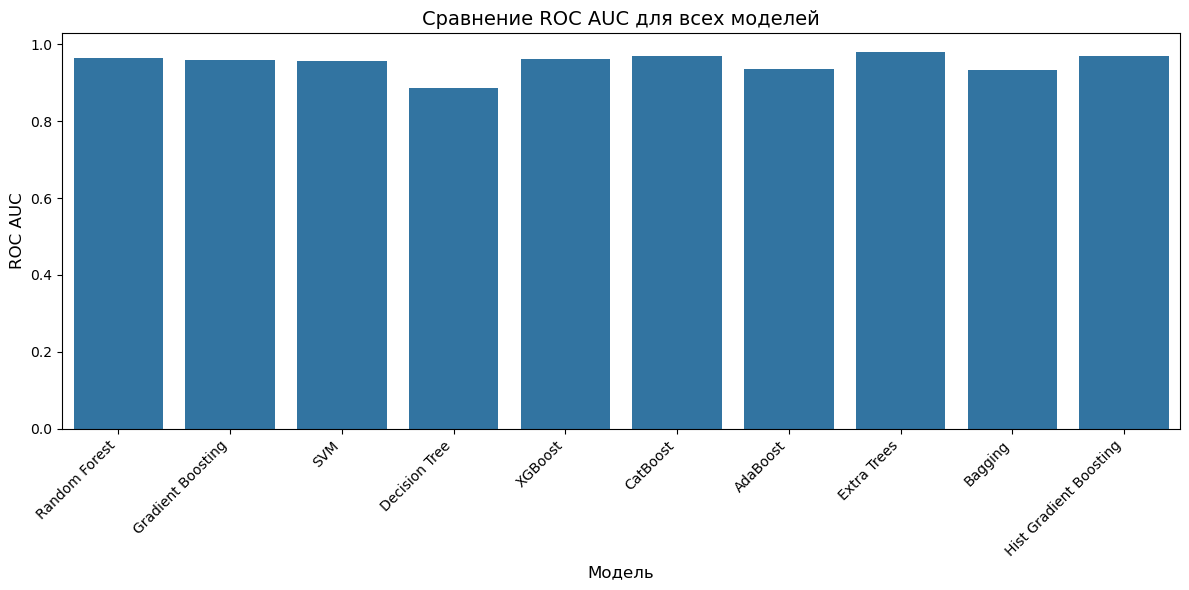

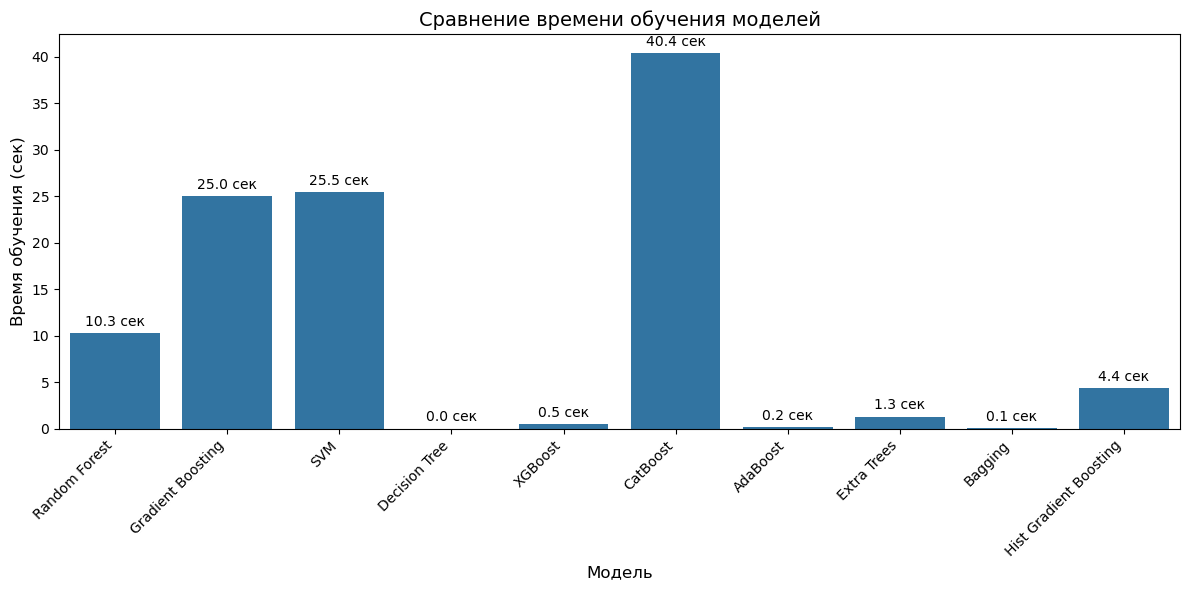

In [82]:
# 1. Сравнение ROC AUC для всех моделей
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='roc_auc', data=results_df)
plt.title('Сравнение ROC AUC для всех моделей', fontsize=14)
plt.xlabel('Модель', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig(f'results/roc_auc_comparison_{timestamp}.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Сравнение времени обучения
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='model', y='training_time', data=results_df)
plt.title('Сравнение времени обучения моделей', fontsize=14)
plt.xlabel('Модель', fontsize=12)
plt.ylabel('Время обучения (сек)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем значения на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f сек', padding=3)

plt.tight_layout()
plt.show()
plt.savefig(f'results/training_time_comparison_{timestamp}.png', dpi=300, bbox_inches='tight')
plt.close()


Создание confusion matrix для всех моделей...


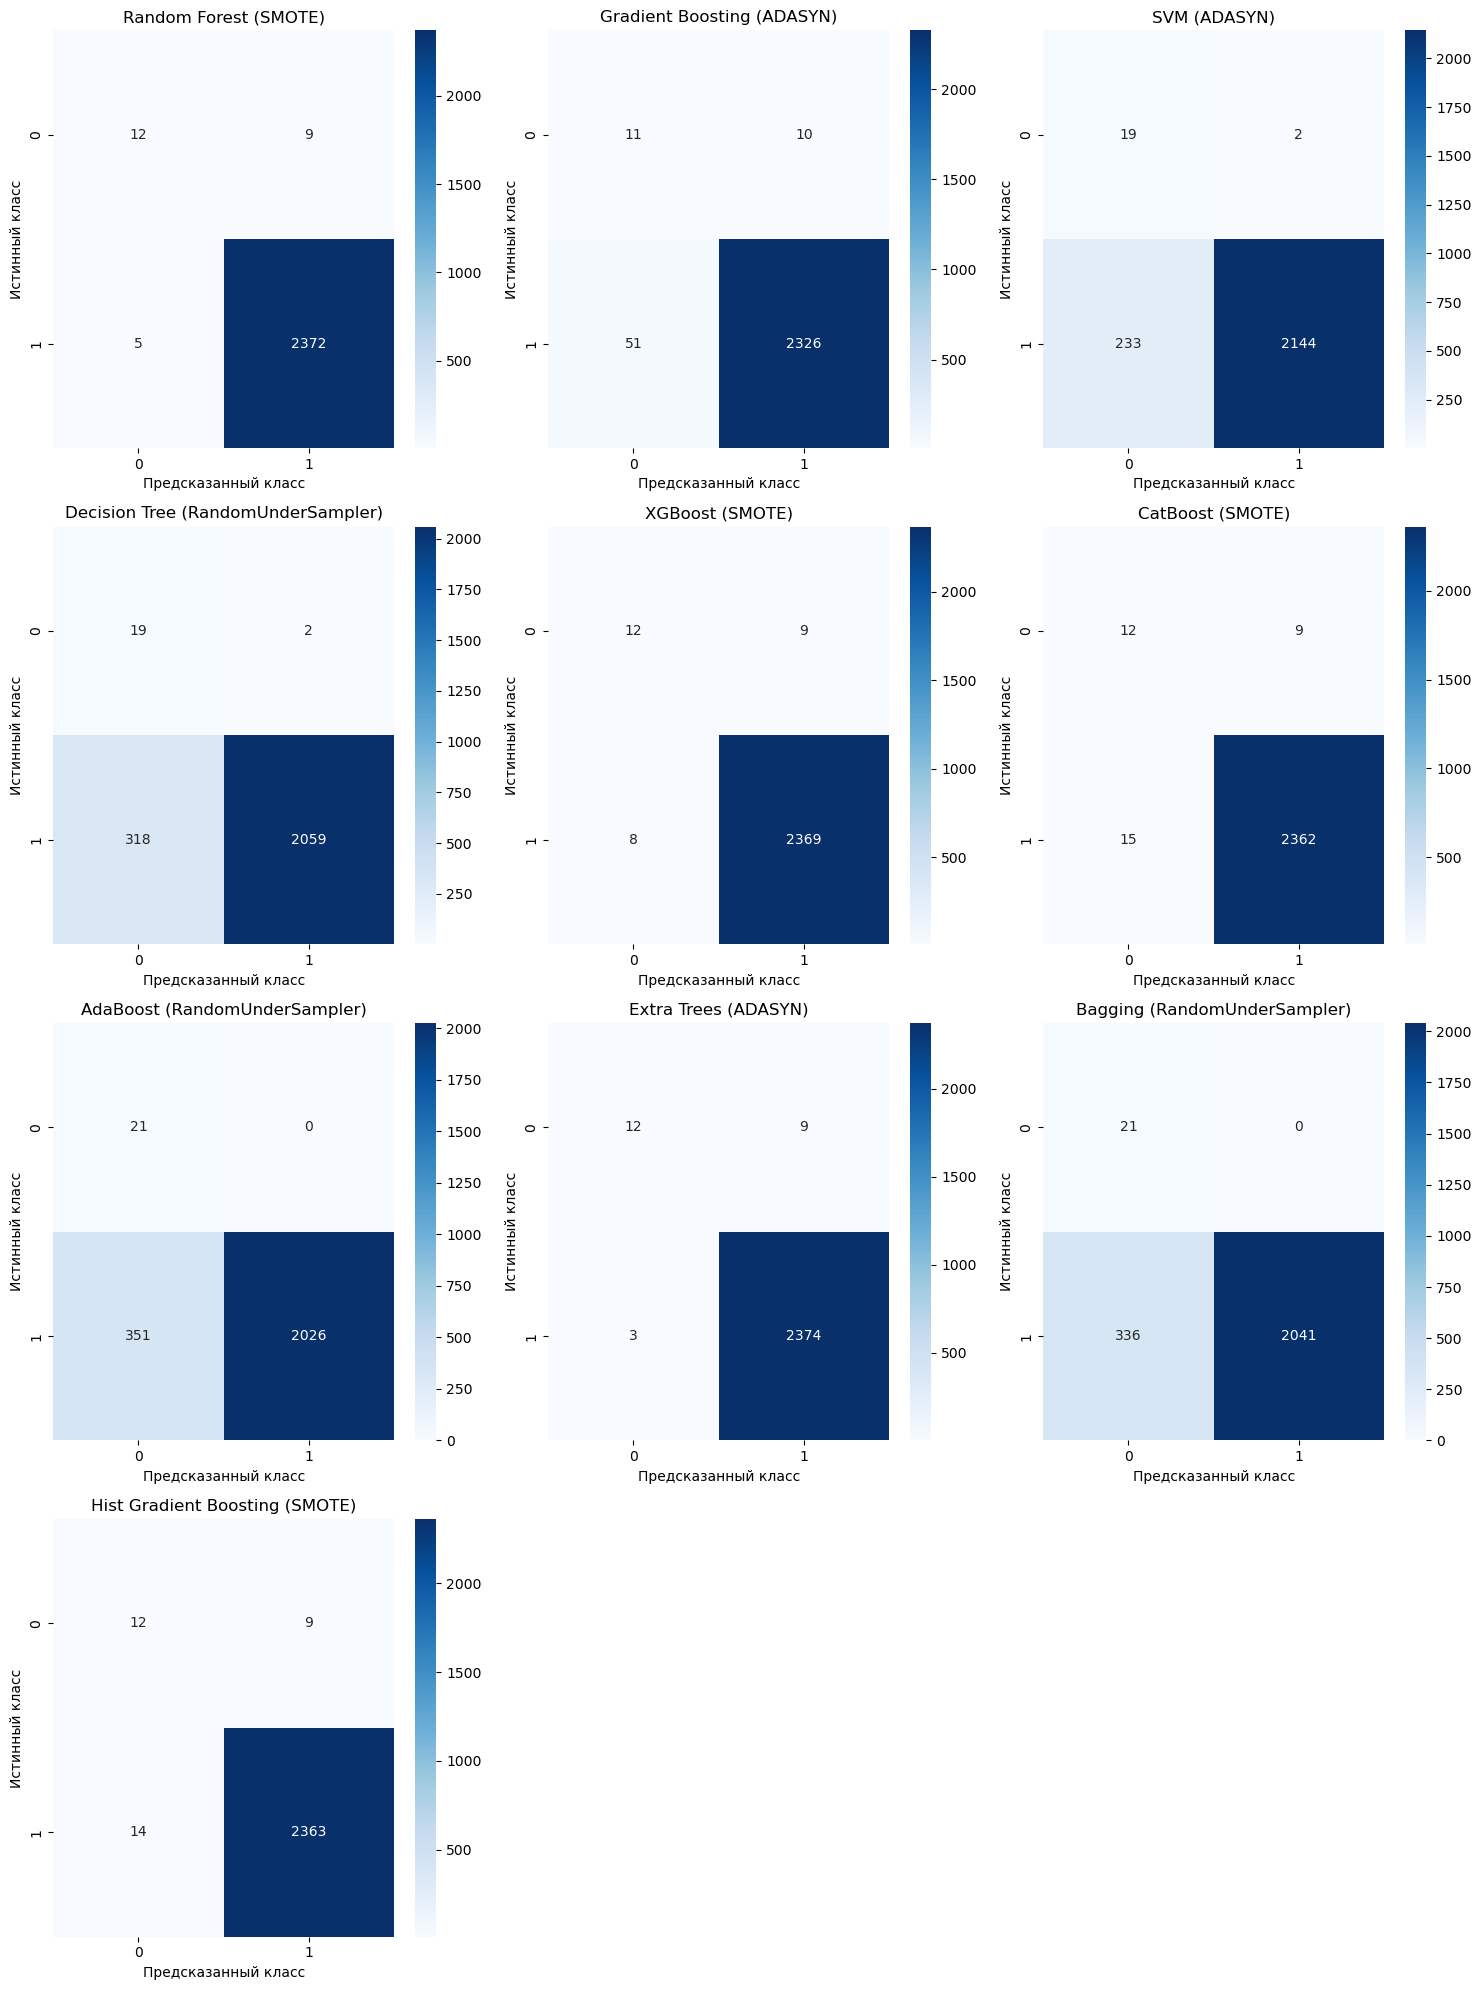

In [74]:
# 3. Confusion Matrix для всех моделей
print("\nСоздание confusion matrix для всех моделей...")
n_models = len(results_df)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, (_, row) in enumerate(results_df.iterrows()):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Получаем предсказания модели
    if hasattr(row, 'model_object'):
        y_pred = row.model_object.predict(X_test)
    else:
        # Если модель не найдена, используем случайные предсказания
        y_pred = np.random.randint(0, 2, size=len(y_test))
    
    # Создаем confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{row['model']} ({row['sampling']})")
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()
plt.savefig(f'results/confusion_matrices_{timestamp}.png', dpi=300, bbox_inches='tight')
plt.close()


Создание столбчатых графиков с результатами в процентах...


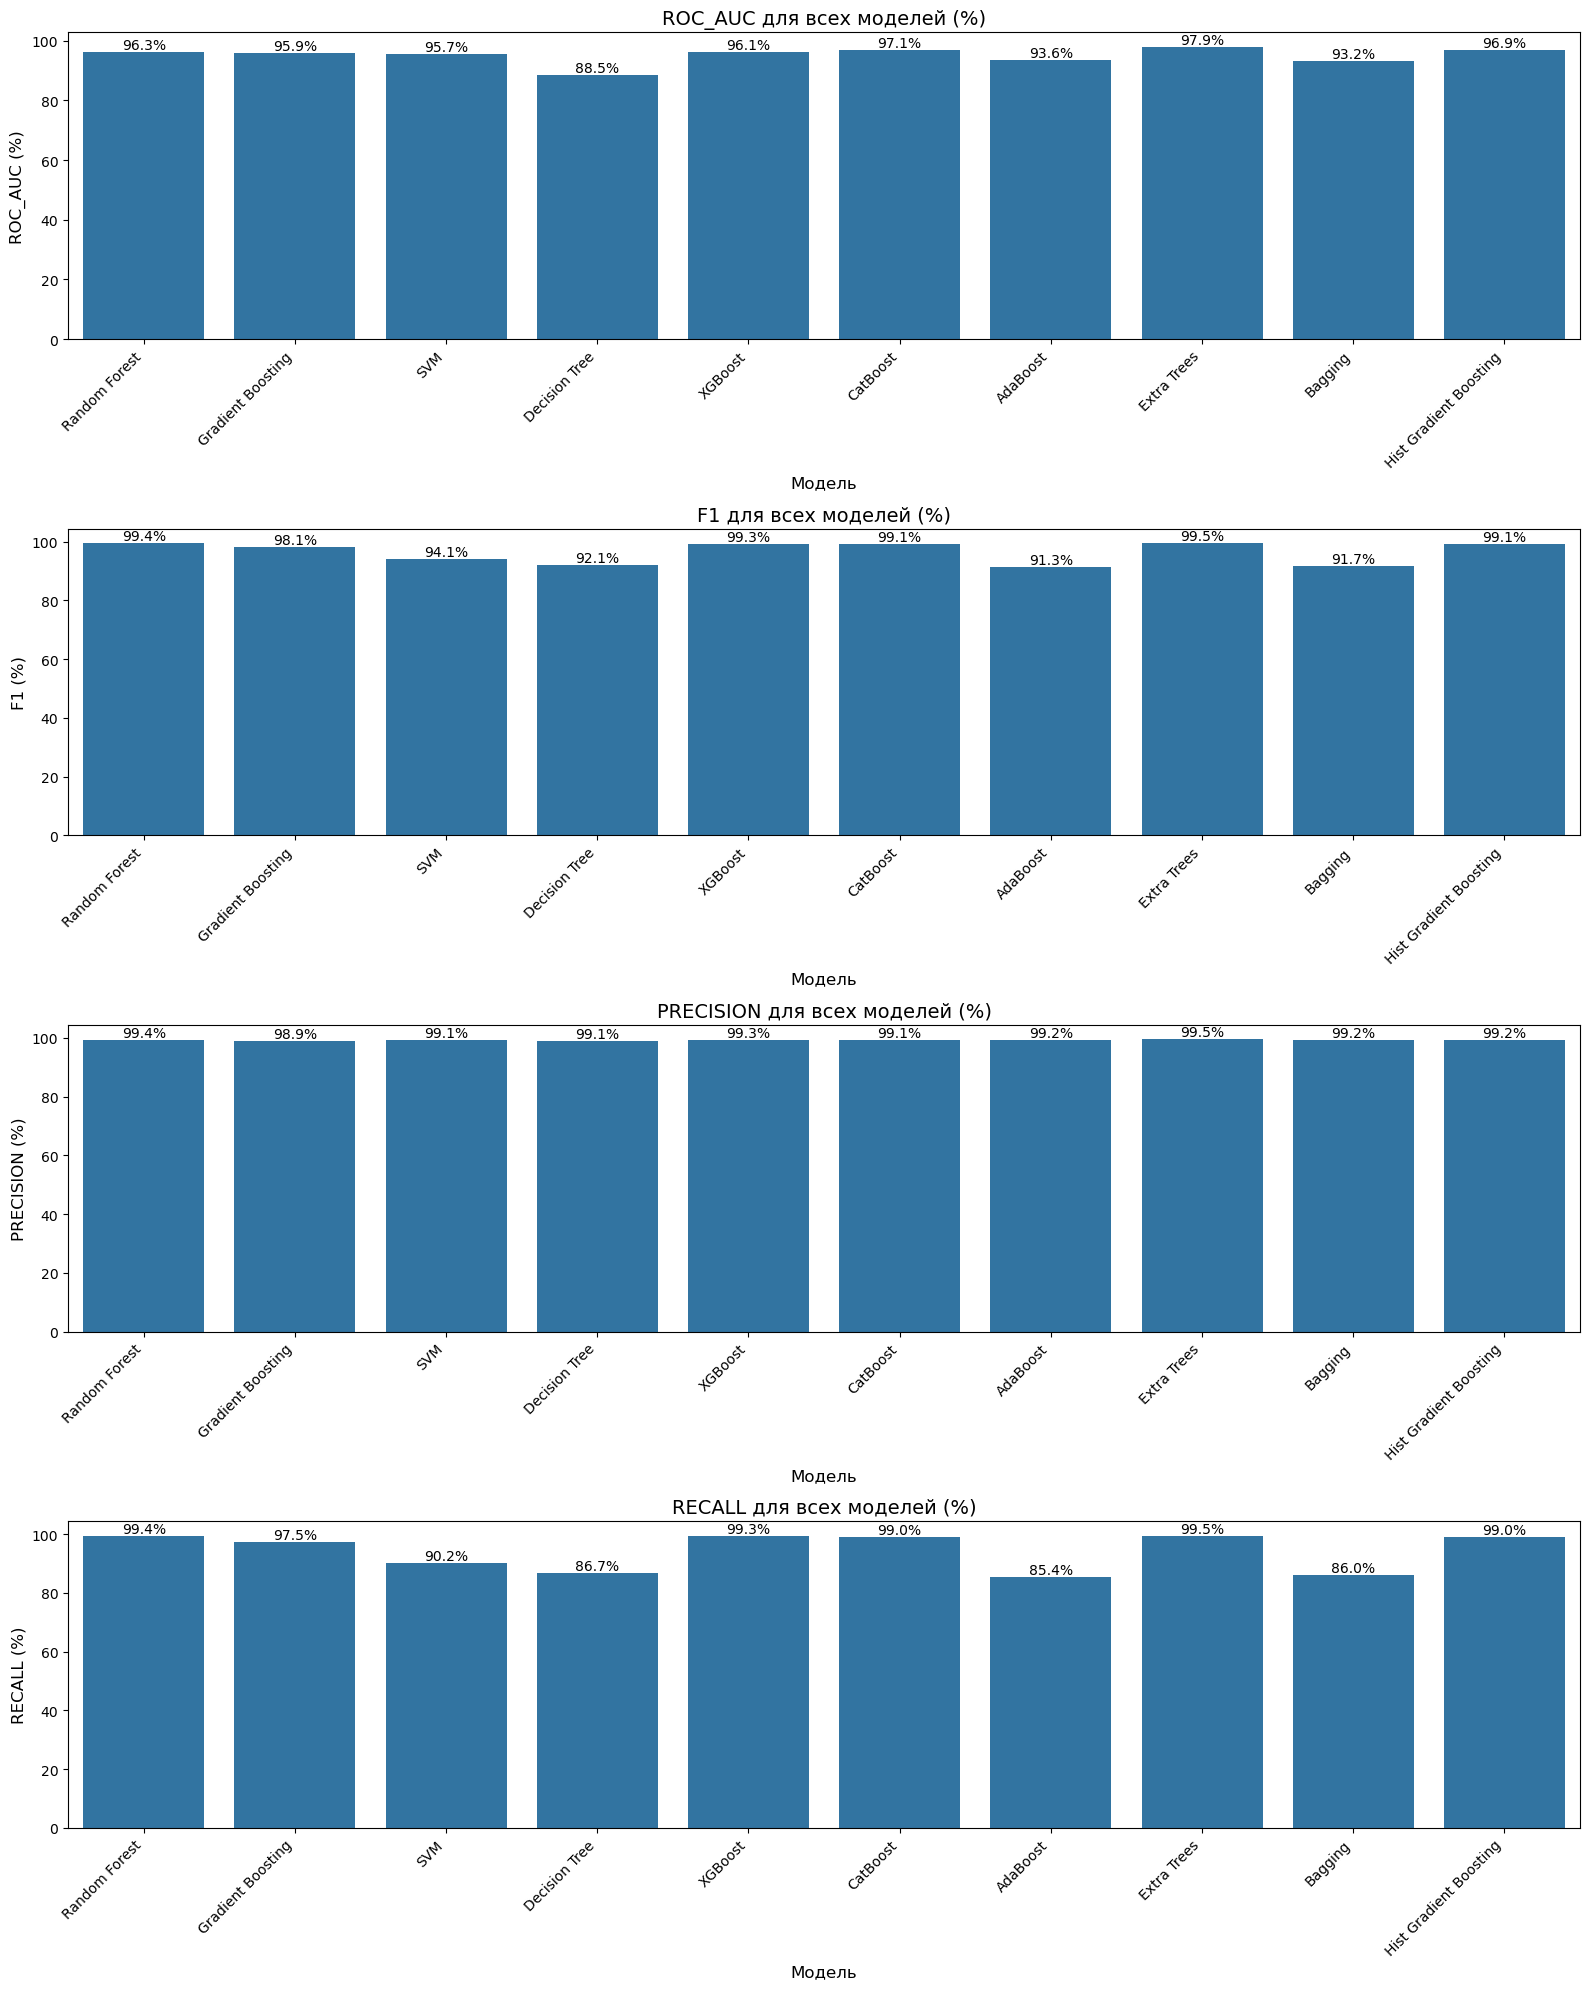


Графики сохранены в директории results/


In [75]:
# 4. Столбчатые графики с результатами в процентах
print("\nСоздание столбчатых графиков с результатами в процентах...")

# Создаем DataFrame с метриками в процентах
metrics_df = results_df.copy()
metrics_df['roc_auc'] = metrics_df['roc_auc'] * 100
metrics_df['f1'] = metrics_df['f1'] * 100
metrics_df['precision'] = metrics_df['precision'] * 100
metrics_df['recall'] = metrics_df['recall'] * 100

# Создаем график для каждой метрики
metrics = ['roc_auc', 'f1', 'precision', 'recall']
n_metrics = len(metrics)
plt.figure(figsize=(16, 4*(n_metrics + 1)))

for i, metric in enumerate(metrics):
    plt.subplot(n_metrics, 1, i+1)
    sns.barplot(x='model', y=metric, data=metrics_df)
    plt.title(f'{metric.upper()} для всех моделей (%)', fontsize=14)
    plt.xlabel('Модель', fontsize=12)
    plt.ylabel(f'{metric.upper()} (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения на столбцы
    for j, value in enumerate(metrics_df[metric]):
        plt.text(j, value, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.savefig(f'results/metrics_percentage_{timestamp}.png', dpi=300, bbox_inches='tight')
plt.close()

print("\nГрафики сохранены в директории results/") 

In [76]:
# 5. Сравнение результатов train и test наборов
print("\nСоздание графика сравнения train и test результатов...")

# Создаем DataFrame для train и test результатов
train_test_metrics = []
for _, row in results_df.iterrows():
    if hasattr(row, 'model_object'):
        try:
            # Получаем предсказания и вероятности для train и test
            y_pred_train = row.model_object.predict(X_train)
            y_pred_test = row.model_object.predict(X_test)
            y_prob_train = row.model_object.predict_proba(X_train)[:, 1]
            y_prob_test = row.model_object.predict_proba(X_test)[:, 1]
            
            # Вычисляем метрики для train
            f1_train = f1_score(y_train, y_pred_train, average='weighted') * 100
            precision_train = precision_score(y_train, y_pred_train, average='weighted') * 100
            recall_train = recall_score(y_train, y_pred_train, average='weighted') * 100
            roc_auc_train = roc_auc_score(y_train, y_prob_train) * 100
            
            # Вычисляем метрики для test
            f1_test = f1_score(y_test, y_pred_test, average='weighted') * 100
            precision_test = precision_score(y_test, y_pred_test, average='weighted') * 100
            recall_test = recall_score(y_test, y_pred_test, average='weighted') * 100
            roc_auc_test = roc_auc_score(y_test, y_prob_test) * 100
            
            train_test_metrics.append({
                'model': row['model'],
                'dataset': 'Train',
                'f1': f1_train,
                'precision': precision_train,
                'recall': recall_train,
                'roc_auc': roc_auc_train
            })
            
            train_test_metrics.append({
                'model': row['model'],
                'dataset': 'Test',
                'f1': f1_test,
                'precision': precision_test,
                'recall': recall_test,
                'roc_auc': roc_auc_test
            })
        except Exception as e:
            print(f"Ошибка при вычислении метрик для модели {row['model']}: {str(e)}")

train_test_df = pd.DataFrame(train_test_metrics)


Создание графика сравнения train и test результатов...


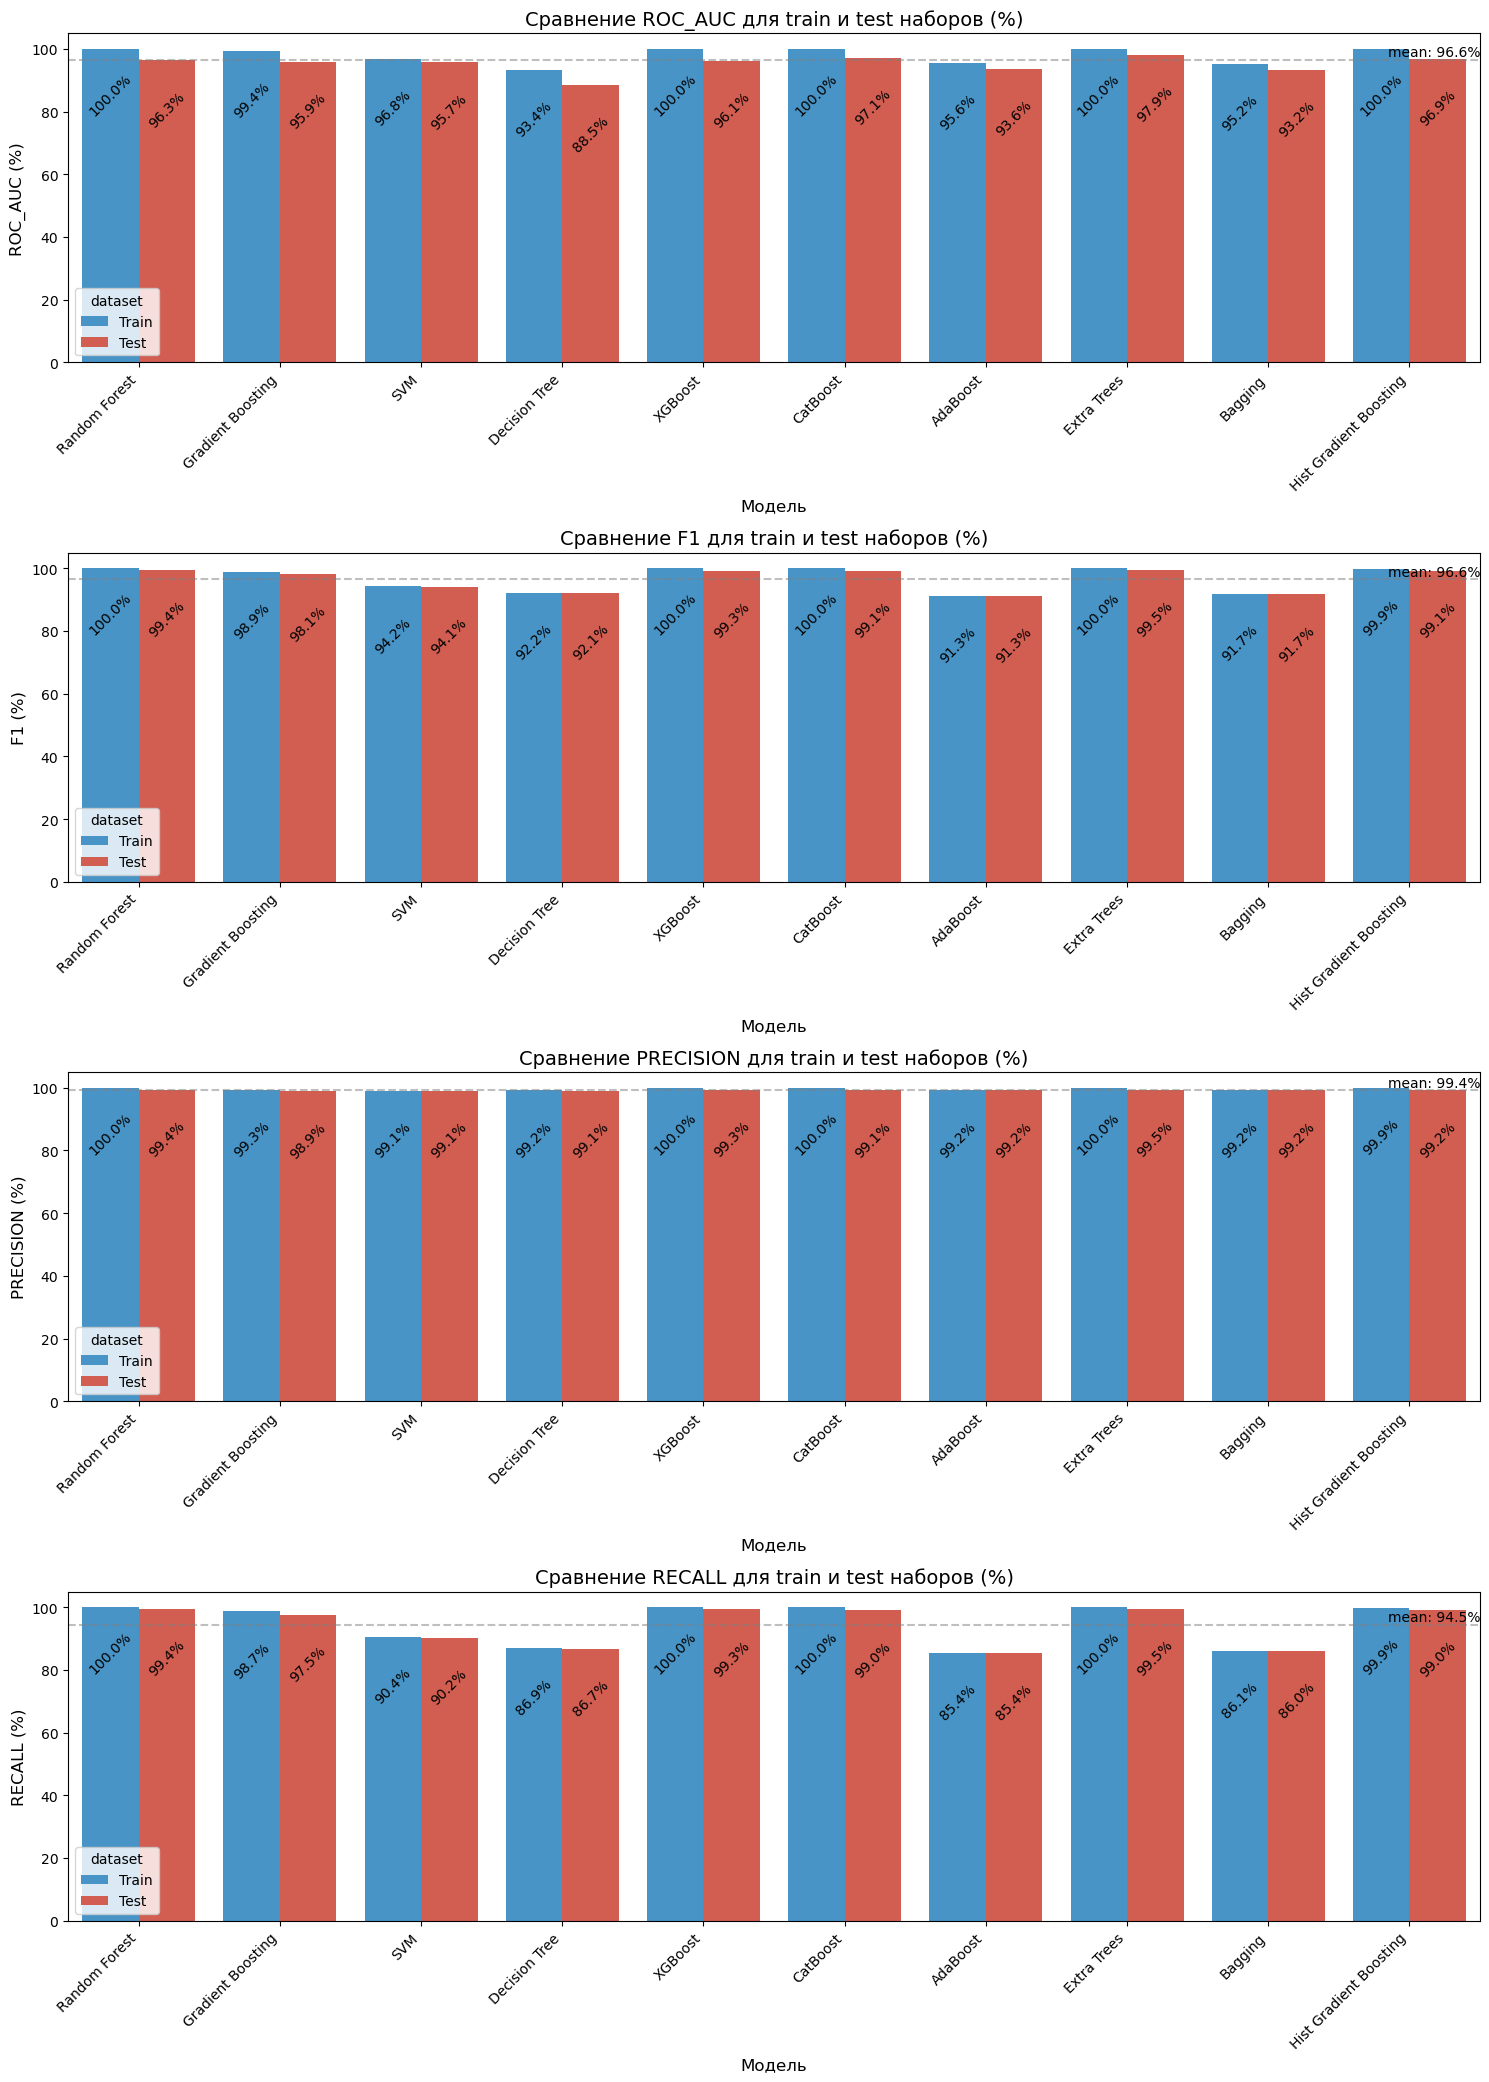

In [77]:
# Создаем график для каждой метрики
metrics = ['roc_auc', 'f1', 'precision', 'recall']
n_metrics = len(metrics) + 3
plt.figure(figsize=(15, 5*n_metrics))

for i, metric in enumerate(metrics):
    plt.subplot(n_metrics, 1, i+1)
    ax = sns.barplot(x='model', y=metric, hue='dataset', data=train_test_df, 
                    palette={'Train': '#3498db', 'Test': '#e74c3c'})
    plt.title(f'Сравнение {metric.upper()} для train и test наборов (%)', fontsize=14)
    plt.xlabel('Модель', fontsize=12)
    plt.ylabel(f'{metric.upper()} (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    
    # Добавляем значения на столбцы
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=-50, rotation=45)
    
    # Добавляем линию для среднего значения
    mean_value = train_test_df[metric].mean()
    plt.axhline(y=mean_value, color='gray', linestyle='--', alpha=0.5)
    plt.text(len(train_test_df['model'].unique()) - 0.5, mean_value, 
             f'mean: {mean_value:.1f}%', ha='right', va='bottom')

plt.tight_layout()
plt.show()
plt.savefig(f'results/train_test_comparison_{timestamp}.png', dpi=300, bbox_inches='tight')
plt.close()

In [78]:
# Создаем сводную таблицу с результатами
print("\nСводная таблица результатов:")
summary_df = train_test_df.pivot_table(
    index='model',
    columns='dataset',
    values=['roc_auc', 'f1', 'precision', 'recall'],
    aggfunc='mean'
)
print(summary_df.round(2))

# Добавляем анализ результатов
print("\nАнализ результатов:")
for metric in metrics:
    train_mean = train_test_df[train_test_df['dataset'] == 'Train'][metric].mean()
    test_mean = train_test_df[train_test_df['dataset'] == 'Test'][metric].mean()
    diff = train_mean - test_mean
    
    print(f"\n{metric.upper()}:")
    print(f"Среднее значение на train: {train_mean:.2f}%")
    print(f"Среднее значение на test: {test_mean:.2f}%")
    print(f"Разница между train и test: {diff:.2f}%")
    
    if diff > 10:
        print("Внимание: Большая разница между train и test может указывать на переобучение!")
    elif diff > 5:
        print("Умеренная разница между train и test.")
    else:
        print("Хорошая стабильность результатов между train и test.")

print("\nГрафики сохранены в директории results/") 


Сводная таблица результатов:
                           f1         precision         recall          \
dataset                  Test   Train      Test   Train   Test   Train   
model                                                                    
AdaBoost                91.32   91.30     99.17   99.16  85.36   85.36   
Bagging                 91.68   91.74     99.18   99.16  85.99   86.11   
CatBoost                99.06  100.00     99.14  100.00  99.00  100.00   
Decision Tree           92.07   92.21     99.08   99.16  86.66   86.91   
Extra Trees             99.46  100.00     99.45  100.00  99.50  100.00   
Gradient Boosting       98.07   98.91     98.86   99.33  97.46   98.66   
Hist Gradient Boosting  99.09   99.91     99.15   99.91  99.04   99.91   
Random Forest           99.39  100.00     99.37  100.00  99.42  100.00   
SVM                     94.10   94.21     99.10   99.10  90.20   90.42   
XGBoost                 99.28  100.00     99.27  100.00  99.29  100.00   

       